In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from PIL import Image, ImageEnhance
from IPython.display import display

# Reading pictures and labels for them

In [2]:
os.getcwd()

'C:\\Users\\Lenovo\\Documents\\Bootcamp\\Projects\\Supervised ML'

In [3]:
os.chdir("aligned_cropped_faces\\crop_part1")

In [4]:
files = os.listdir()
files

['100_1_0_20170110183726390.jpg.chip.jpg',
 '100_1_2_20170105174847679.jpg.chip.jpg',
 '101_1_2_20170105174739309.jpg.chip.jpg',
 '10_0_0_20161220222308131.jpg.chip.jpg',
 '10_0_0_20170103200329407.jpg.chip.jpg',
 '10_0_0_20170103200522151.jpg.chip.jpg',
 '10_0_0_20170103233459275.jpg.chip.jpg',
 '10_0_0_20170104013211746.jpg.chip.jpg',
 '10_0_0_20170110215927291.jpg.chip.jpg',
 '10_0_0_20170110220033115.jpg.chip.jpg',
 '10_0_0_20170110220111082.jpg.chip.jpg',
 '10_0_0_20170110220235233.jpg.chip.jpg',
 '10_0_0_20170110220251986.jpg.chip.jpg',
 '10_0_0_20170110220255346.jpg.chip.jpg',
 '10_0_0_20170110220316298.jpg.chip.jpg',
 '10_0_0_20170110220403810.jpg.chip.jpg',
 '10_0_0_20170110220447314.jpg.chip.jpg',
 '10_0_0_20170110220503946.jpg.chip.jpg',
 '10_0_0_20170110220514186.jpg.chip.jpg',
 '10_0_0_20170110220530650.jpg.chip.jpg',
 '10_0_0_20170110220539329.jpg.chip.jpg',
 '10_0_0_20170110220541850.jpg.chip.jpg',
 '10_0_0_20170110220546177.jpg.chip.jpg',
 '10_0_0_20170110220548521.jpg.

In [5]:
gender = []

for file in files:
    sex = file.split("_")[1]
    if sex in ["0", "1"]:
        gender.append(sex)
    else:
        print(file)

61_3_20170109150557335.jpg.chip.jpg


In [6]:
files.remove("61_3_20170109150557335.jpg.chip.jpg")

In [7]:
ages = []

for file in files:
    age = file.split("_")[0]
    ages.append(age)

In [8]:
len(files)

9779

In [9]:
len(gender)

9779

In [10]:
files

['100_1_0_20170110183726390.jpg.chip.jpg',
 '100_1_2_20170105174847679.jpg.chip.jpg',
 '101_1_2_20170105174739309.jpg.chip.jpg',
 '10_0_0_20161220222308131.jpg.chip.jpg',
 '10_0_0_20170103200329407.jpg.chip.jpg',
 '10_0_0_20170103200522151.jpg.chip.jpg',
 '10_0_0_20170103233459275.jpg.chip.jpg',
 '10_0_0_20170104013211746.jpg.chip.jpg',
 '10_0_0_20170110215927291.jpg.chip.jpg',
 '10_0_0_20170110220033115.jpg.chip.jpg',
 '10_0_0_20170110220111082.jpg.chip.jpg',
 '10_0_0_20170110220235233.jpg.chip.jpg',
 '10_0_0_20170110220251986.jpg.chip.jpg',
 '10_0_0_20170110220255346.jpg.chip.jpg',
 '10_0_0_20170110220316298.jpg.chip.jpg',
 '10_0_0_20170110220403810.jpg.chip.jpg',
 '10_0_0_20170110220447314.jpg.chip.jpg',
 '10_0_0_20170110220503946.jpg.chip.jpg',
 '10_0_0_20170110220514186.jpg.chip.jpg',
 '10_0_0_20170110220530650.jpg.chip.jpg',
 '10_0_0_20170110220539329.jpg.chip.jpg',
 '10_0_0_20170110220541850.jpg.chip.jpg',
 '10_0_0_20170110220546177.jpg.chip.jpg',
 '10_0_0_20170110220548521.jpg.

# Creating DataFrame

In [11]:
df = pd.DataFrame({"file": files, "gender": gender, "age": ages})

In [12]:
df

file gender  age
0     100_1_0_20170110183726390.jpg.chip.jpg      1  100
1     100_1_2_20170105174847679.jpg.chip.jpg      1  100
2     101_1_2_20170105174739309.jpg.chip.jpg      1  101
3      10_0_0_20161220222308131.jpg.chip.jpg      0   10
4      10_0_0_20170103200329407.jpg.chip.jpg      0   10
...                                      ...    ...  ...
9774    9_1_3_20161220222856346.jpg.chip.jpg      1    9
9775    9_1_3_20170104222949455.jpg.chip.jpg      1    9
9776    9_1_4_20170103200637399.jpg.chip.jpg      1    9
9777    9_1_4_20170103200814791.jpg.chip.jpg      1    9
9778    9_1_4_20170103213057382.jpg.chip.jpg      1    9

[9779 rows x 3 columns]

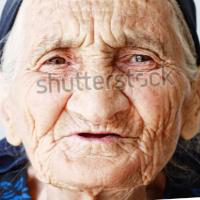

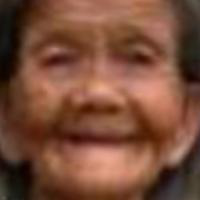

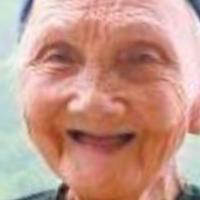

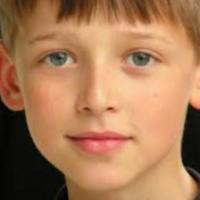

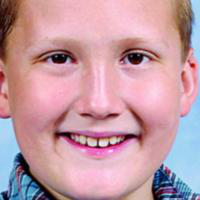

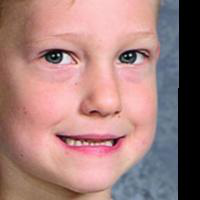

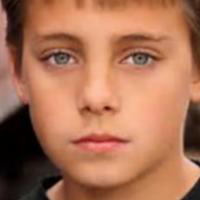

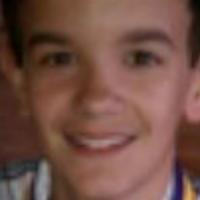

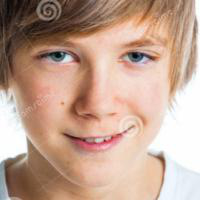

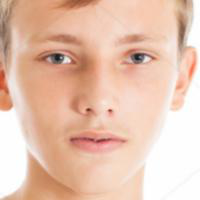

In [13]:
for file in df["file"].head(10):
    img = Image.open(file)
    display(img)

In [14]:
# shuffle df
df = df.sample(frac=1).reset_index(drop=True)

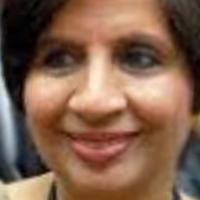

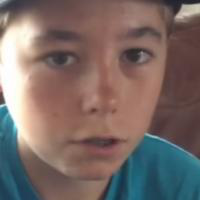

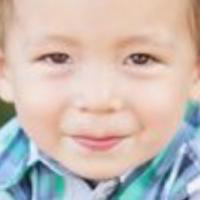

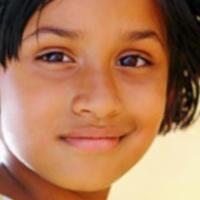

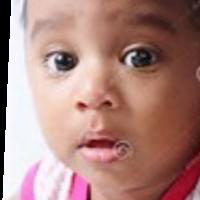

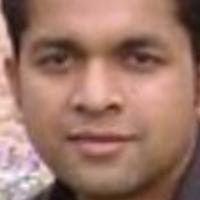

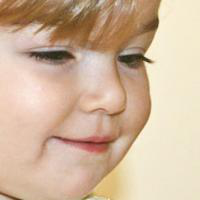

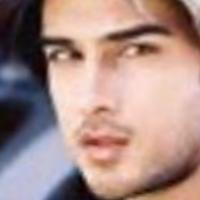

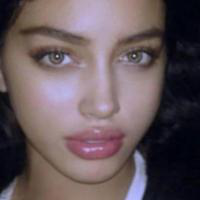

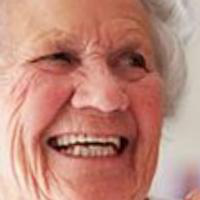

In [15]:
for file in df["file"].head(10):
    img = Image.open(file)
    display(img)

# Preprocessing Images

### Augmentation

In [16]:
# !pip install Augmentor
import Augmentor
import random

In [17]:
augment = Augmentor.Pipeline()

augment.flip_left_right(probability=0.3)
augment.flip_top_bottom(probability=0.3)
augment.rotate(probability=0.3, max_left_rotation=15, max_right_rotation=15)
augment.random_brightness(probability=0.3, min_factor=0.7, max_factor=1.3)
augment.random_contrast(probability=0.3, min_factor=0.7, max_factor=1.3)
augment.random_color(probability=0.3, min_factor=0.7, max_factor=1.3)

def augment_image(image, augmentor=augment):
    img_array = np.array(image)
    augmented_images = augmentor._execute_with_array(img_array)
    return augmented_images

### Function for resizing, flattening, augmenting, and normalizing image vector

In [18]:
def preprocess_image(image_path):
    img = Image.open(image_path)
    
    resized = img.resize((100, 100))
    
    # With augmentation the model predicts worse, so I turned off it here 
    # if random.random() < 0.1:
    #     resized = augment_image(resized)
    
    array = np.array(resized)
    
    flatten = array.flatten()
    normalized = flatten / 255
    
    return normalized

In [19]:
# creating timer context manager
import time
from contextlib import contextmanager

@contextmanager
def timer():
    start_time = time.perf_counter()
    yield
    end_time = time.perf_counter()
    execution_time = end_time - start_time
    print("Execution time:", execution_time, "seconds")

# Train Test Split

In [20]:
# change amount of pictures to make training faster 
df = df[:4000]

In [21]:
from sklearn.model_selection import train_test_split

X = np.array(df["file"].apply(preprocess_image).tolist())
y = df["gender"]
age = df["age"]

In [22]:
# Manual train test split on shuffled df for saving age data

test_size = 0.20

test_index = int(len(df) * (1 - test_size))

X_train = X[:test_index]
X_test = X[test_index:]

y_train = y[:test_index]
y_test = y[test_index:]

age_train = age[:test_index]
age_test = age[test_index:]

In [23]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Baseline (Dummy Classifier)

In [24]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, f1_score

baseline_model = DummyClassifier(strategy="most_frequent")

baseline_model.fit(X_train, y_train)

baseline_predictions = baseline_model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, baseline_predictions)}")
print(f"F1 Score: {f1_score(y_test, baseline_predictions, pos_label='1')}")

Accuracy: 0.5425
F1 Score: 0.7034035656401945


# Training SVM Model

In [25]:
import time

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


svc = SVC()

with timer():
    svc.fit(X_train, y_train)

svc

Execution time: 71.73779739998281 seconds


SVC()

Accuracy: 0.8825
F1 Score: 0.8923253150057273
Execution time: 226.8565634000115 seconds


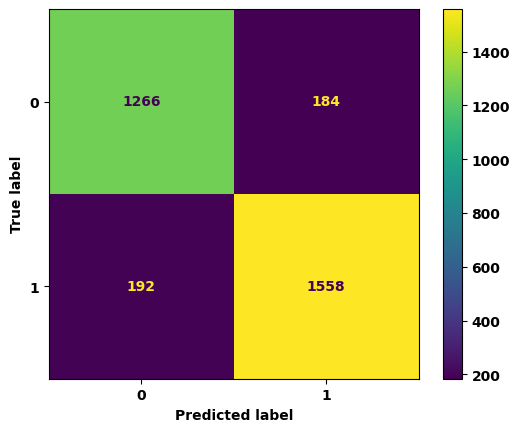

In [26]:
with timer():
    train_predictions = svc.predict(X_train)
    print(f"Accuracy: {accuracy_score(y_train, train_predictions)}")
    print(f"F1 Score: {f1_score(y_train, train_predictions, pos_label='1')}")
    ConfusionMatrixDisplay.from_predictions(y_train, train_predictions)

# Grid Search

In [27]:
from sklearn.model_selection import GridSearchCV

# param_grid_svc = {
#     'kernel': ['rbf', 'sigmoid'],
#     'C': [0.01, 0.1, 1],
# }

svc = SVC()

grid = GridSearchCV(estimator=svc, param_grid={}, cv=5, n_jobs=-1, scoring="f1")

grid.fit(X_train, y_train)

# print(f"Accuracy: {accuracy_score(y_train, grid.predict(X_train))}")
# ConfusionMatrixDisplay.from_estimator(grid, X_train, y_train)

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan]
  warnings.warn(


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1, param_grid={}, scoring='f1')

In [28]:
svc = grid.best_estimator_

In [29]:
# grid.best_params_

#### Default parameters are best

# Test Data

In [30]:
test_predictions = svc.predict(X_test)

In [31]:
print(f"Accuracy: {accuracy_score(y_test, test_predictions)}")
print(f"F1 Score: {f1_score(y_test, test_predictions, pos_label='1')}")

Accuracy: 0.7825
F1 Score: 0.7999999999999999


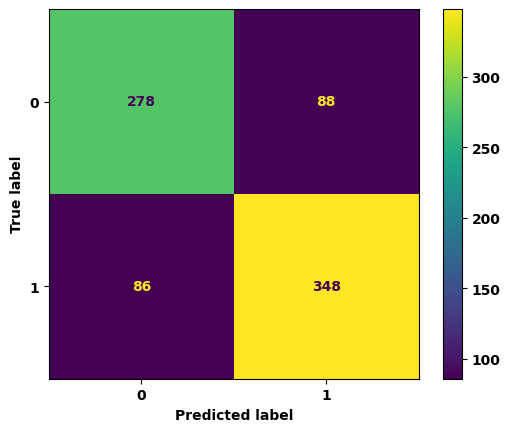

In [32]:
ConfusionMatrixDisplay.from_predictions(y_test, test_predictions)

# Analysing Incorrectly Classified Images

In [33]:
incorrect_indices = np.where(test_predictions != y_test)[0]

In [34]:
incorrect_images = []

for idx in incorrect_indices:
    image = X_test[idx].reshape((100, 100, 3)) 
    incorrect_images.append(image)

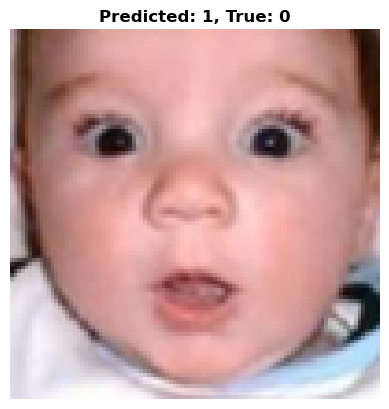

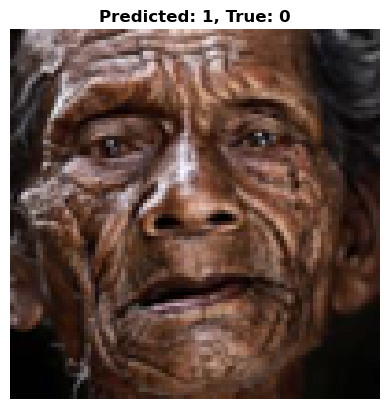

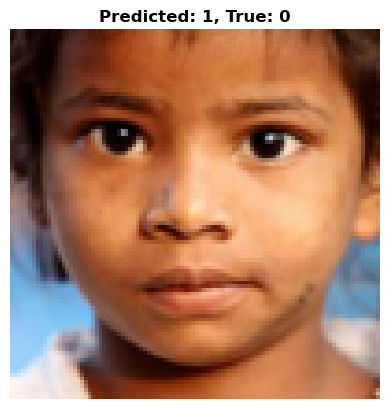

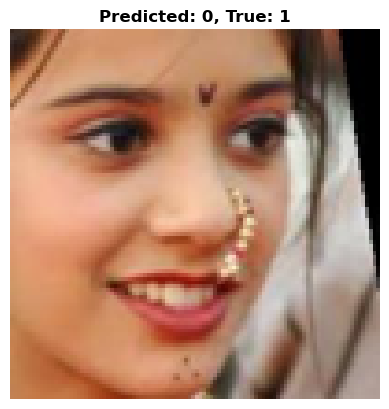

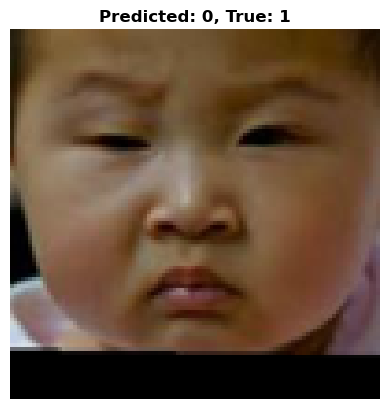

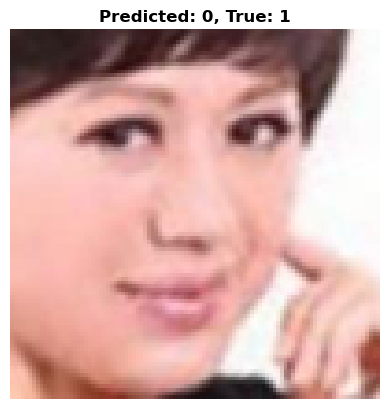

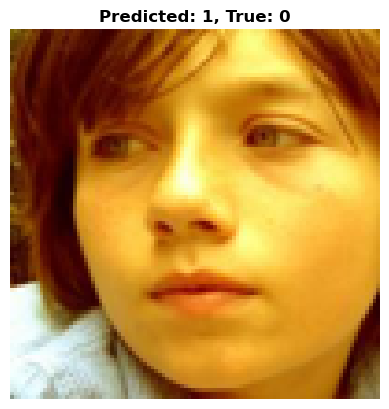

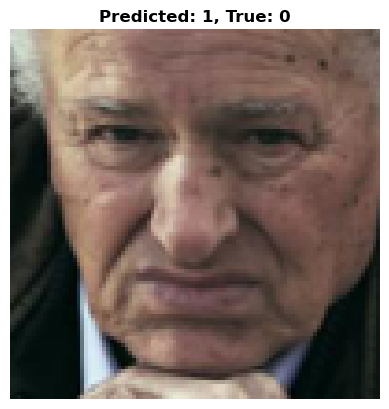

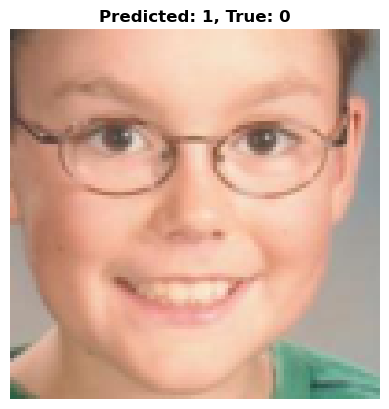

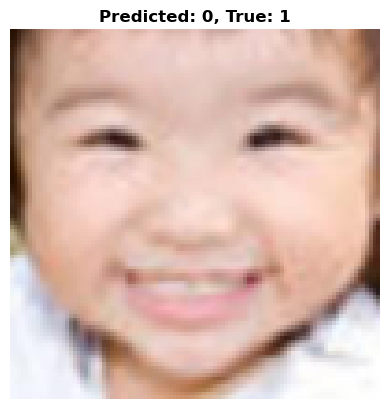

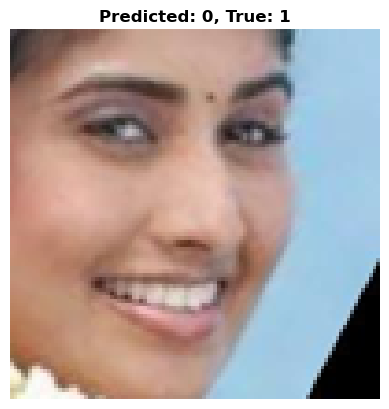

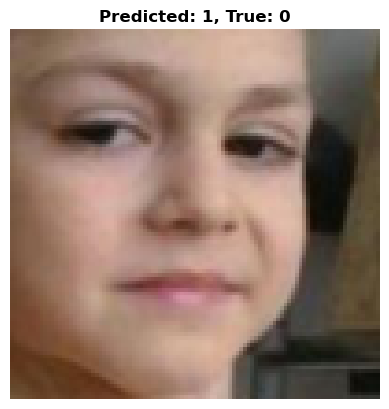

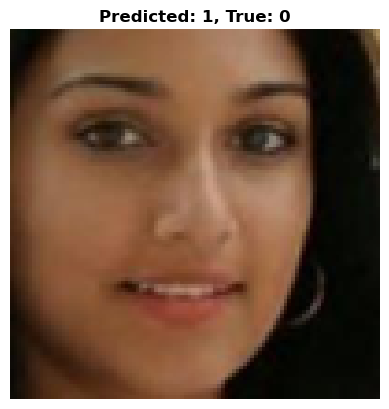

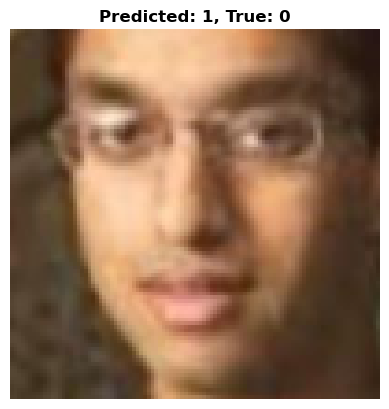

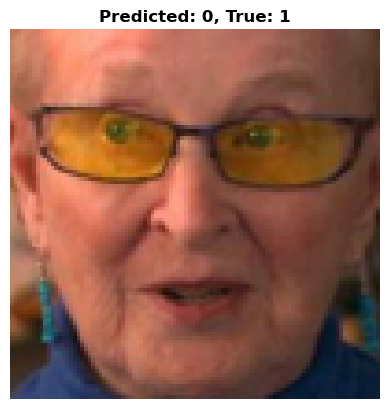

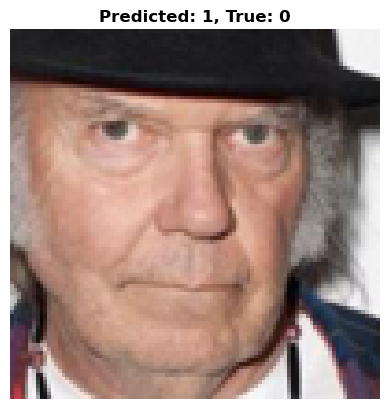

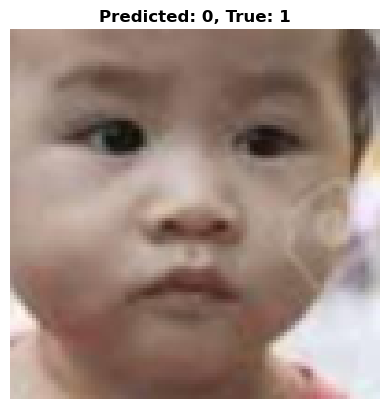

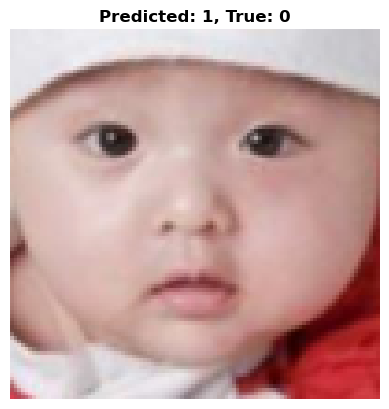

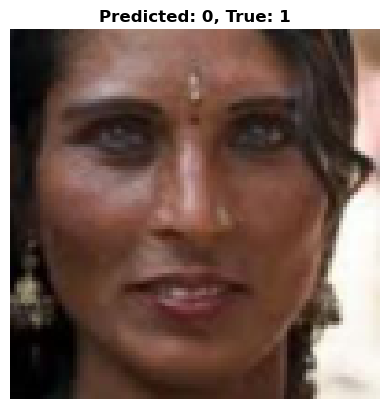

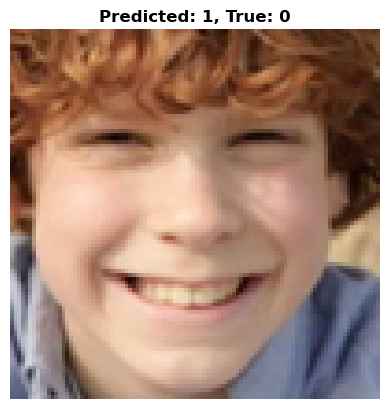

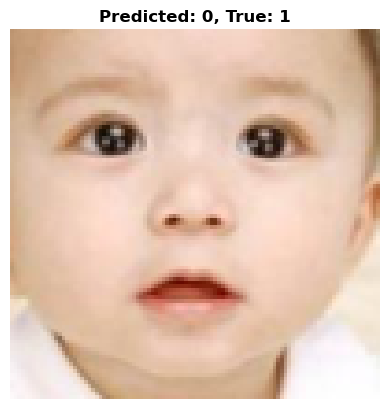

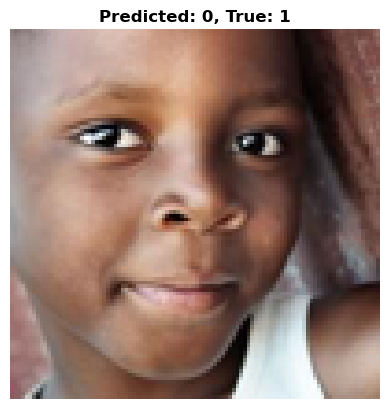

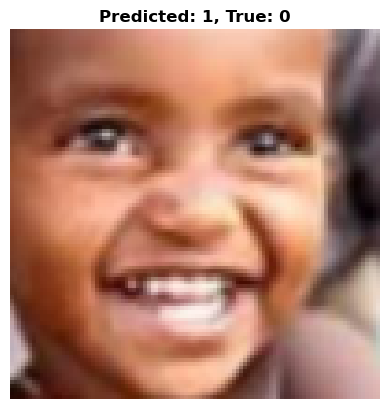

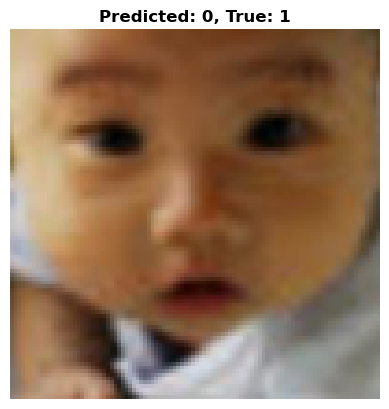

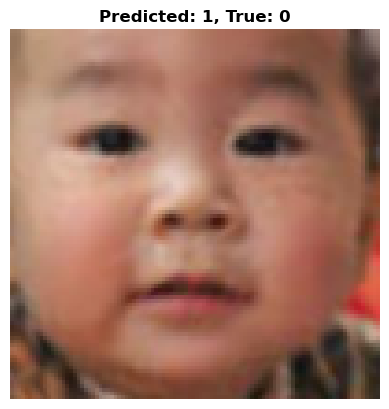

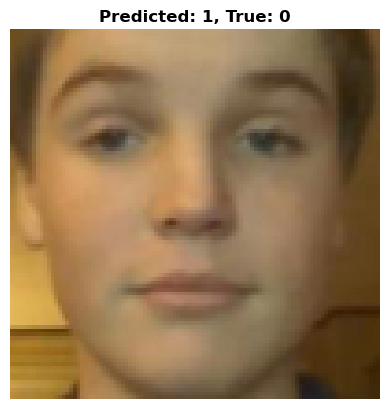

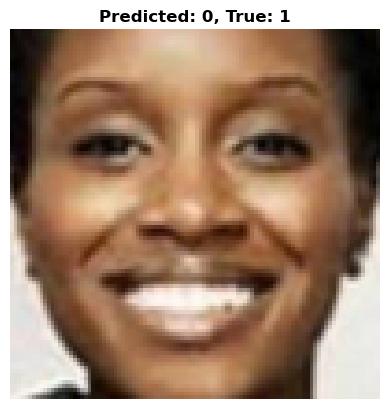

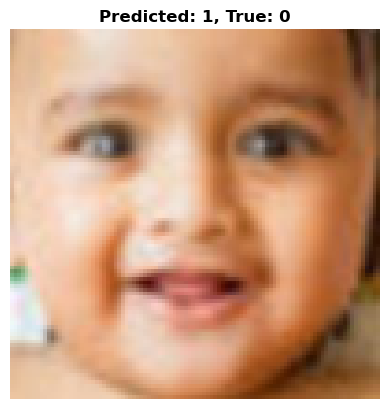

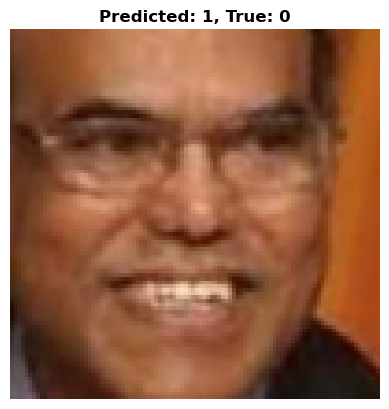

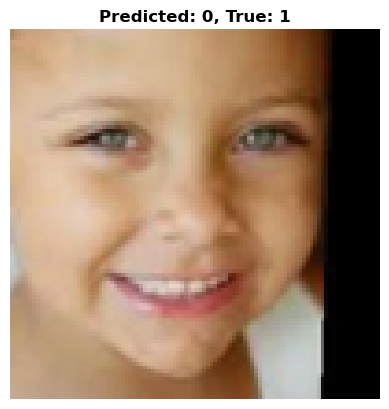

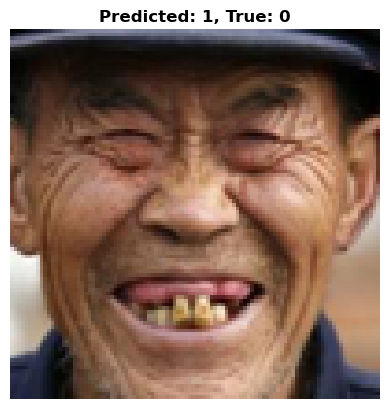

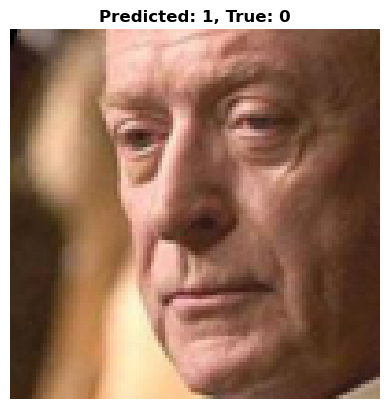

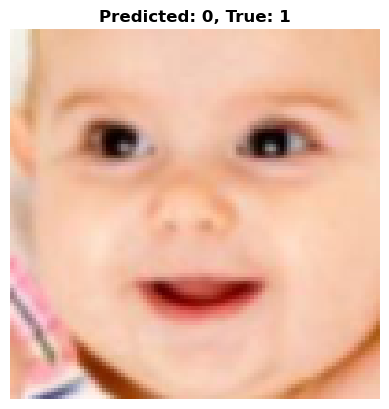

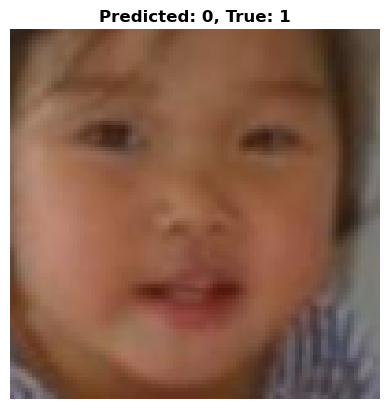

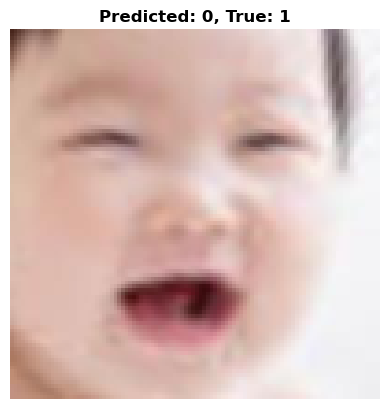

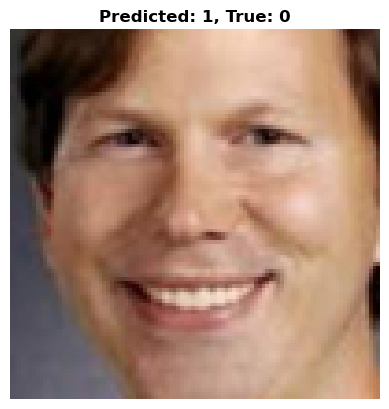

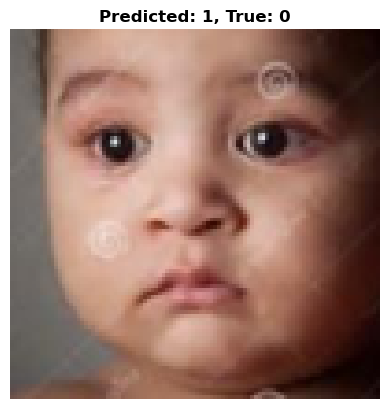

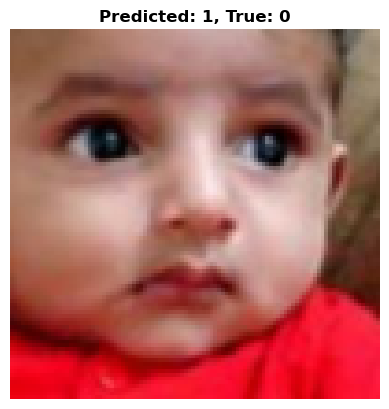

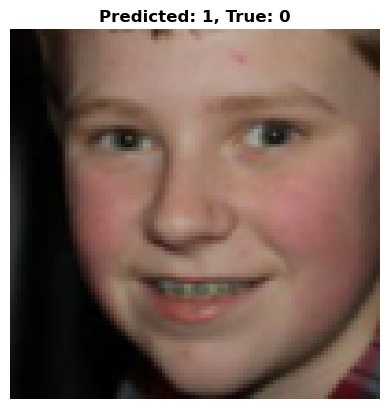

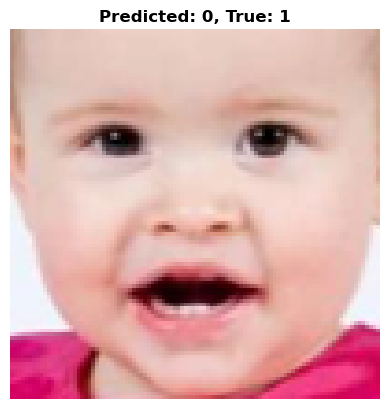

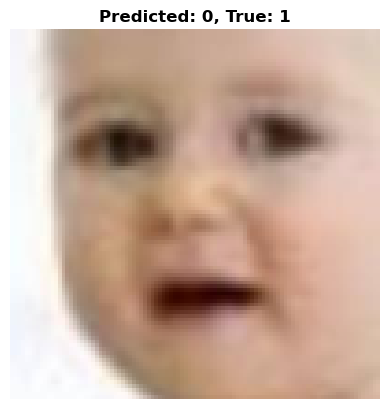

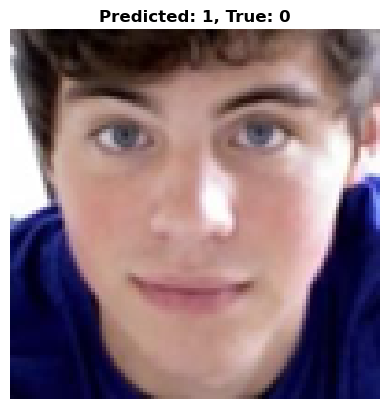

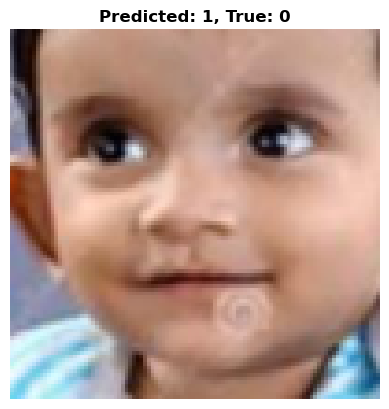

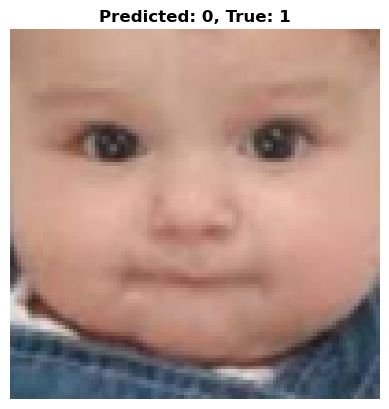

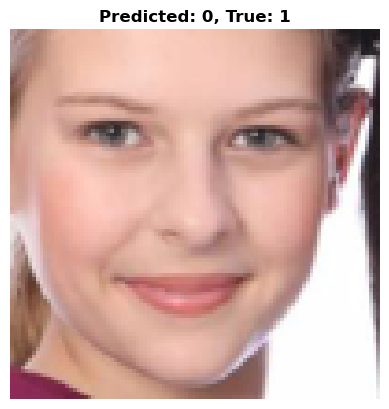

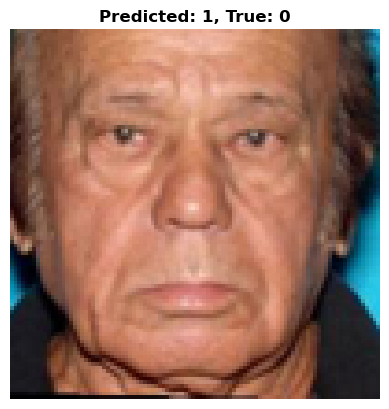

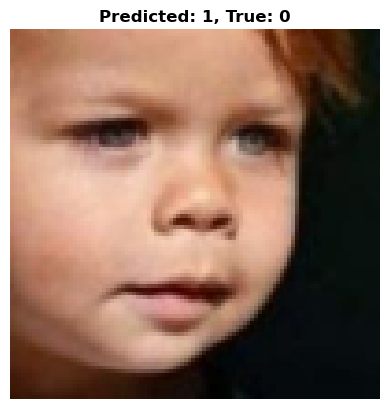

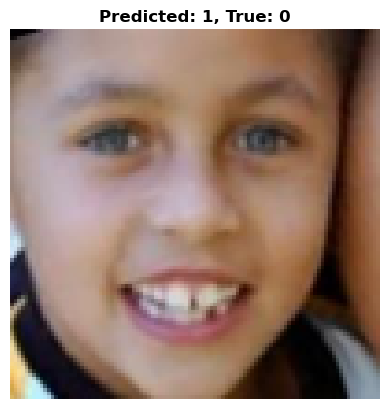

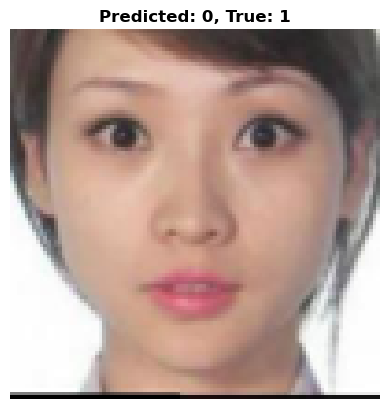

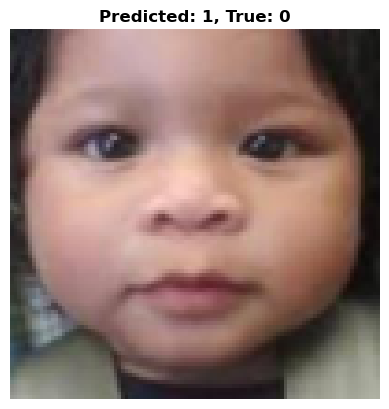

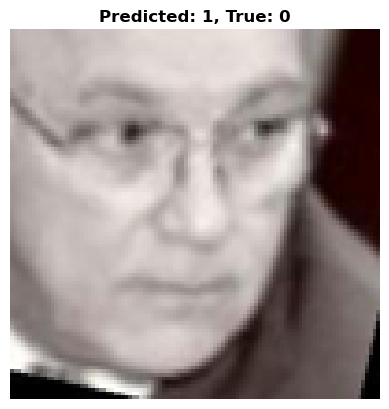

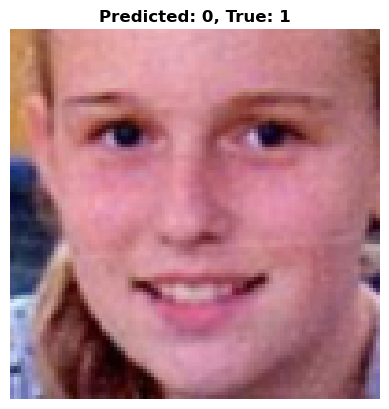

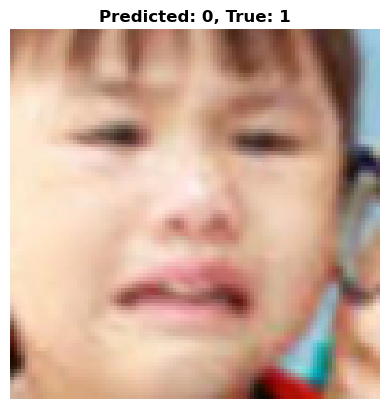

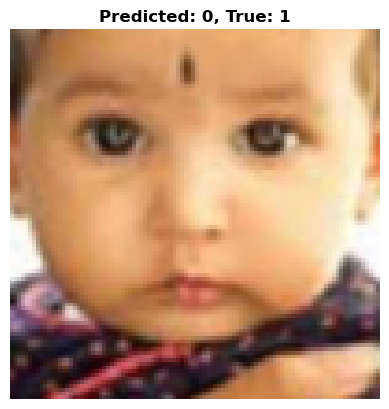

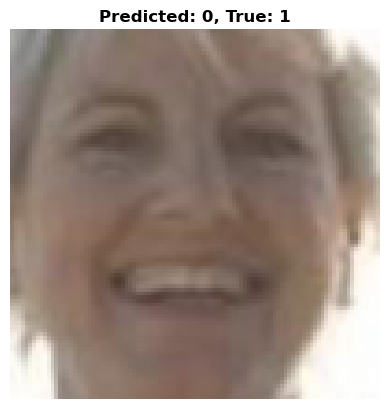

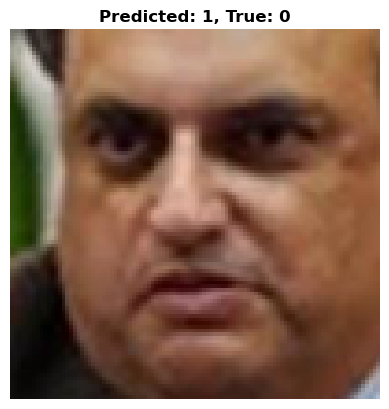

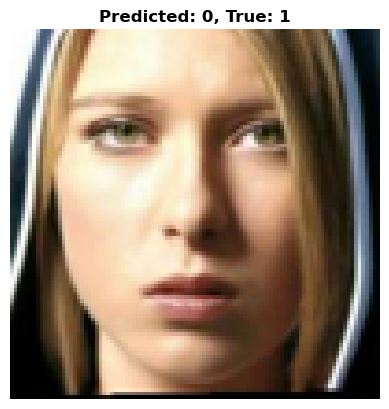

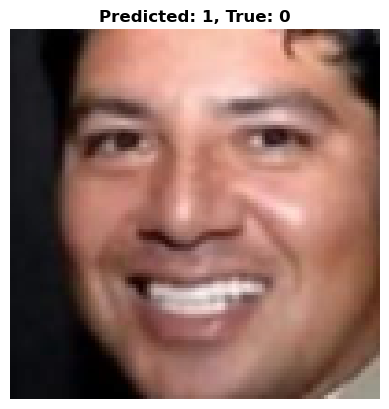

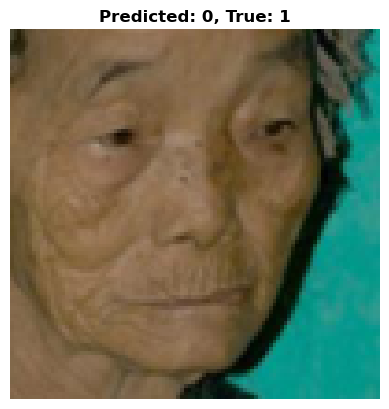

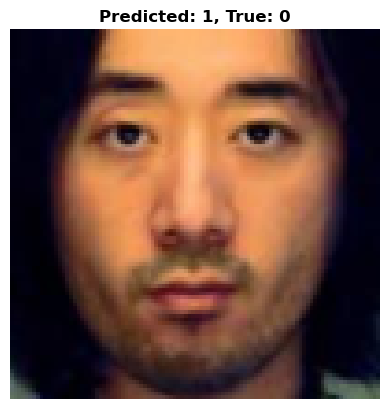

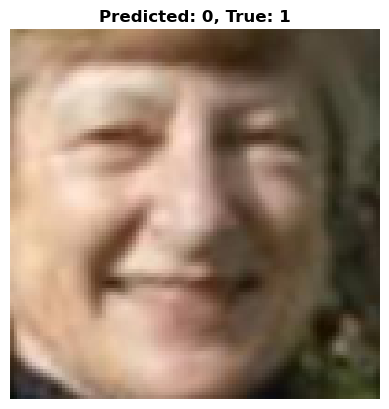

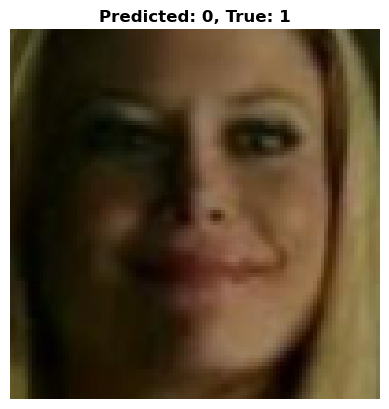

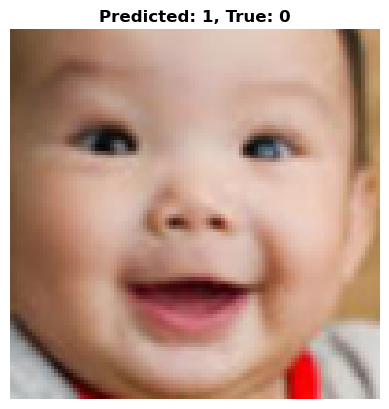

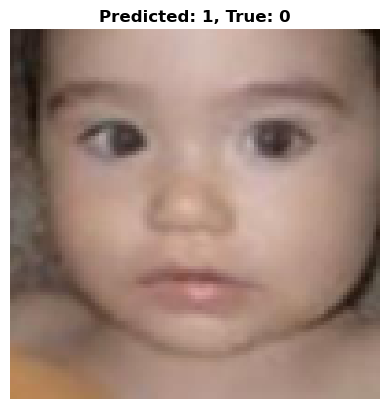

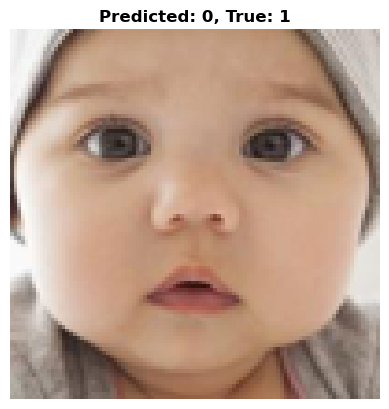

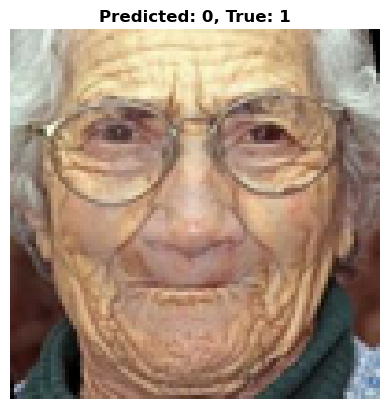

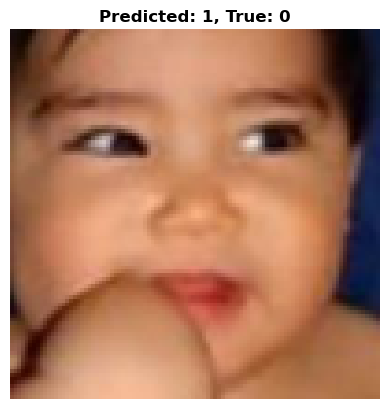

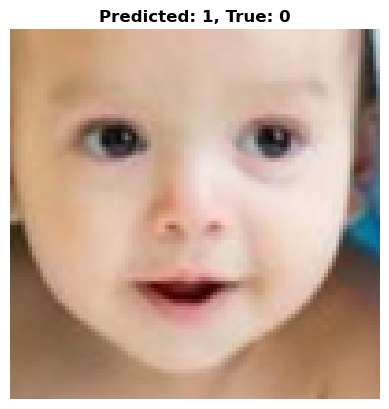

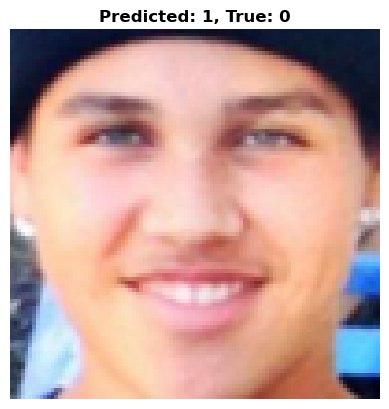

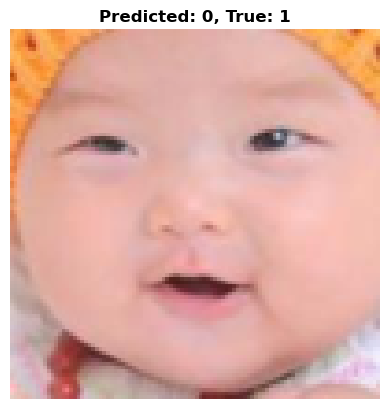

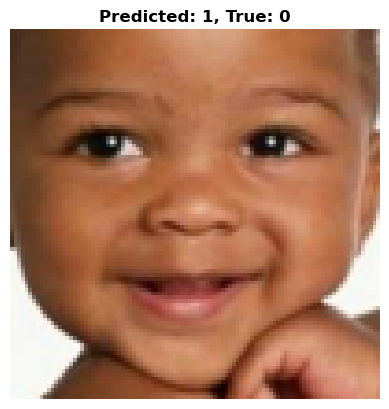

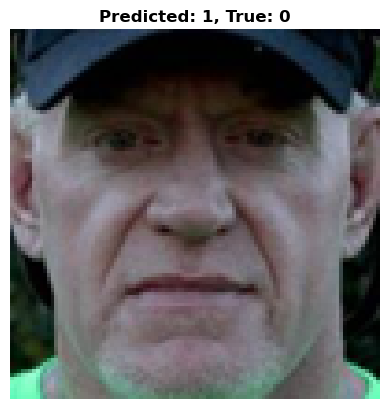

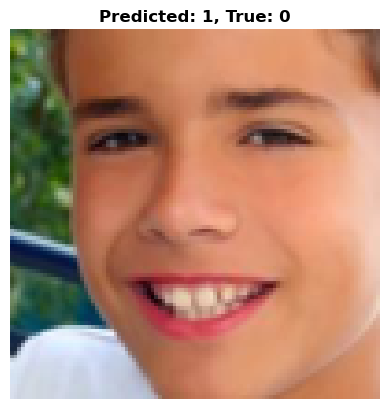

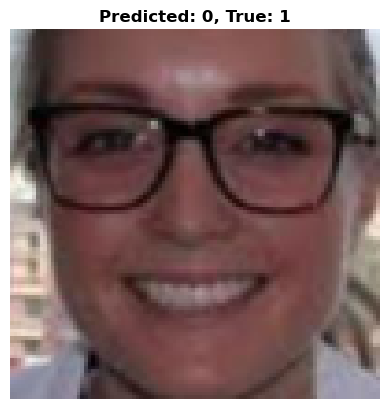

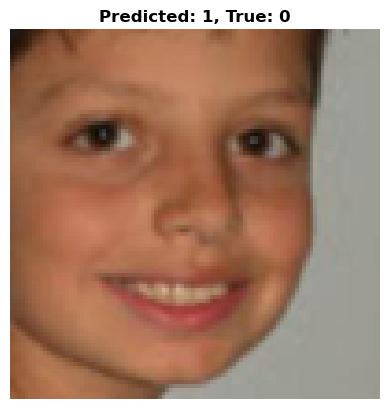

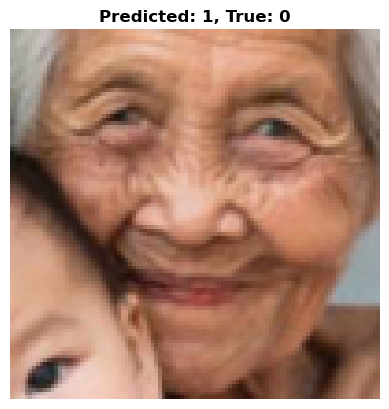

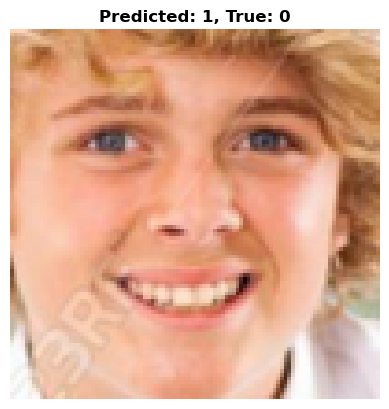

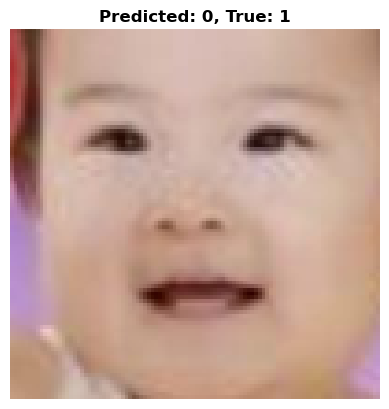

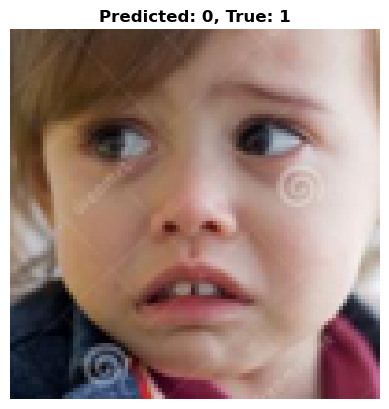

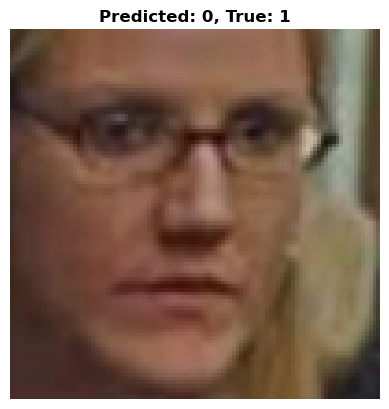

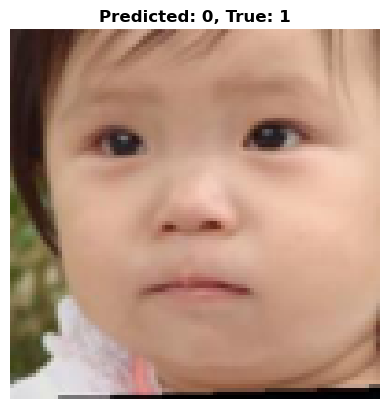

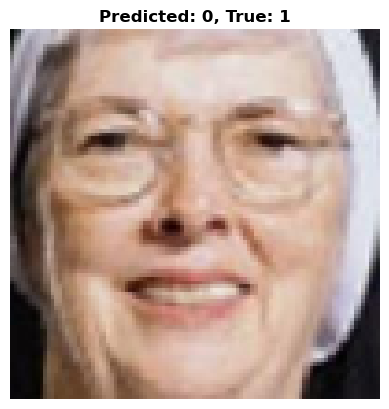

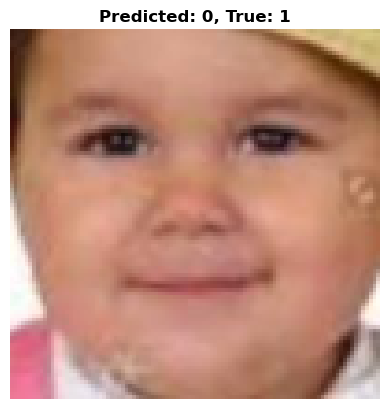

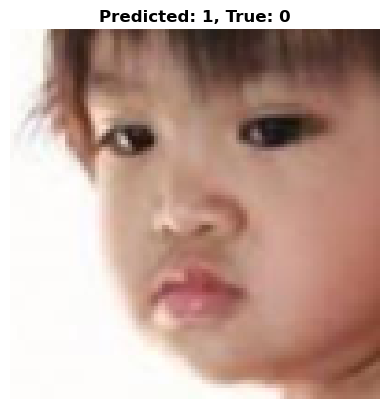

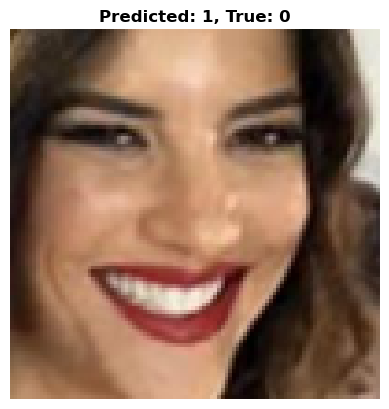

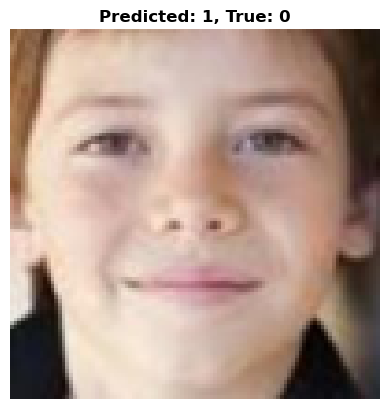

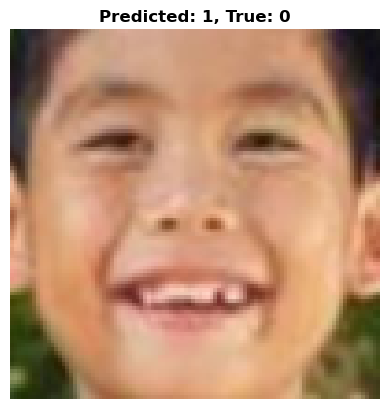

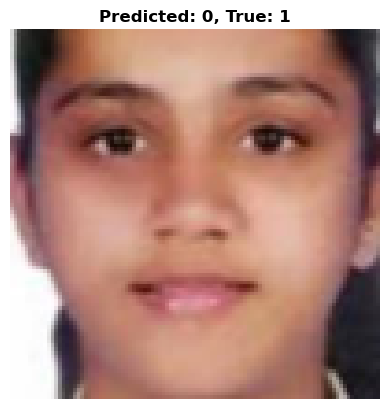

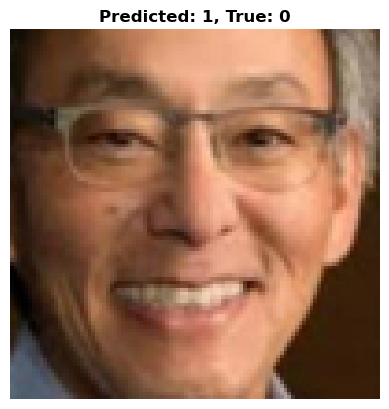

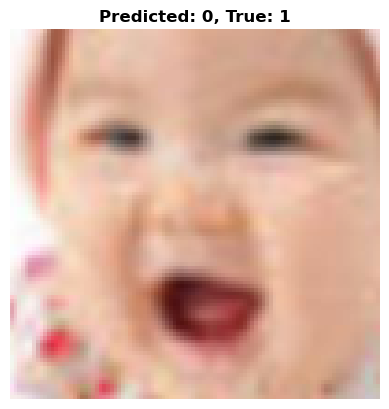

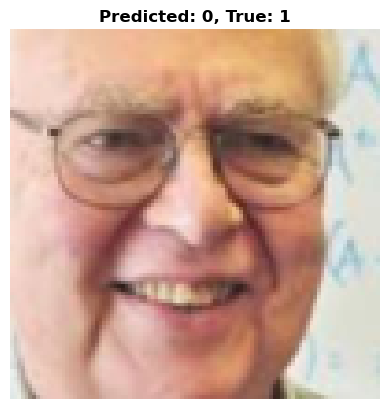

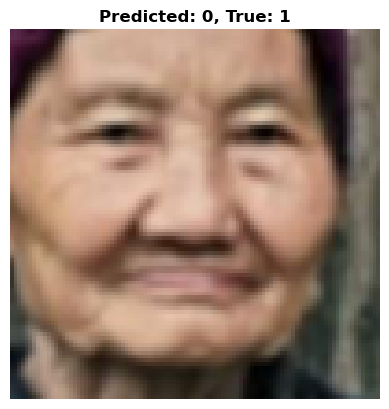

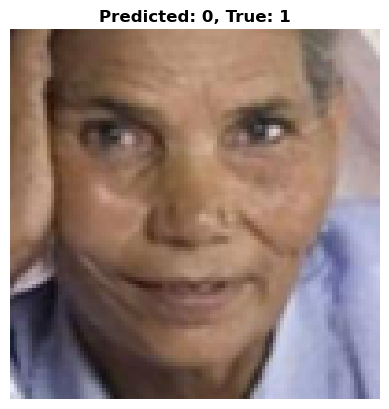

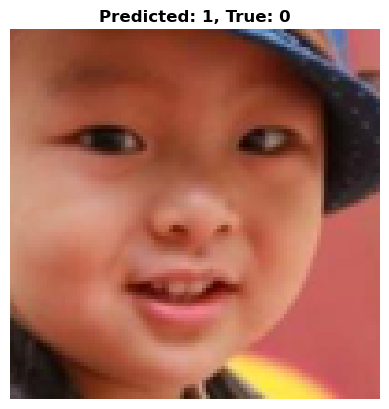

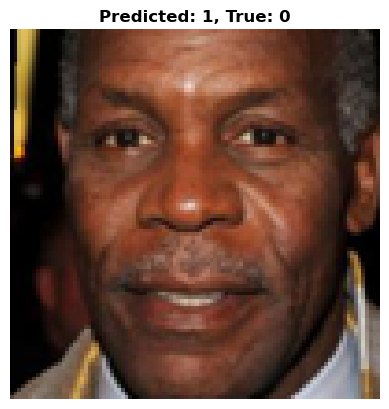

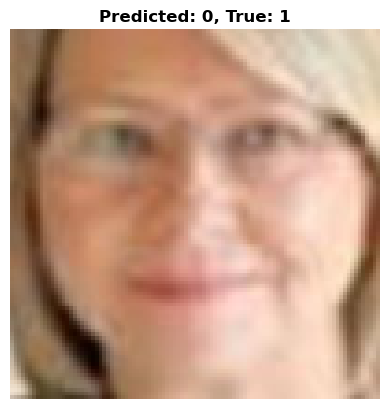

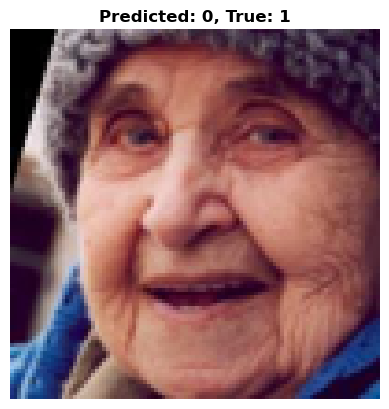

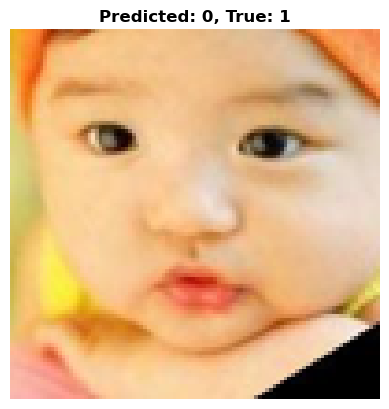

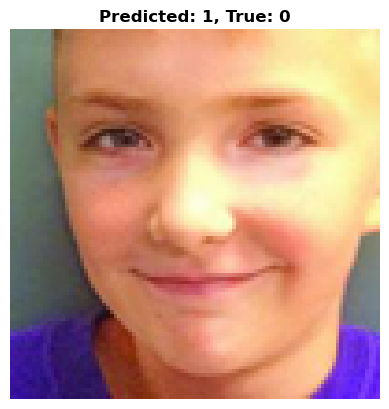

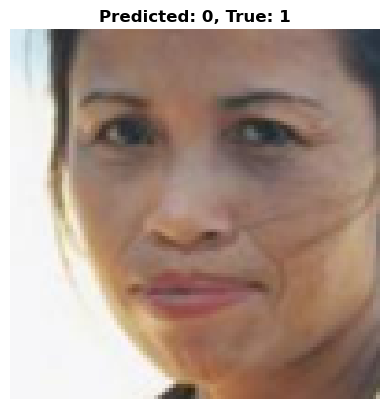

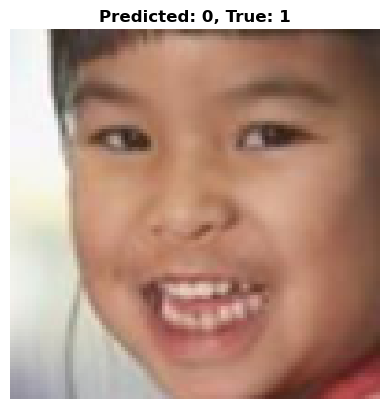

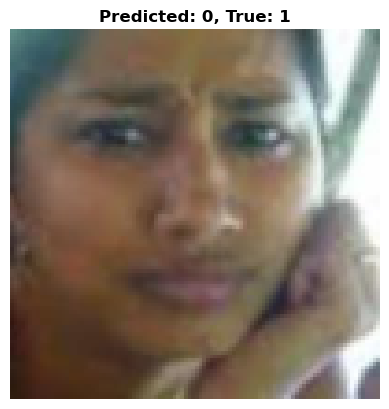

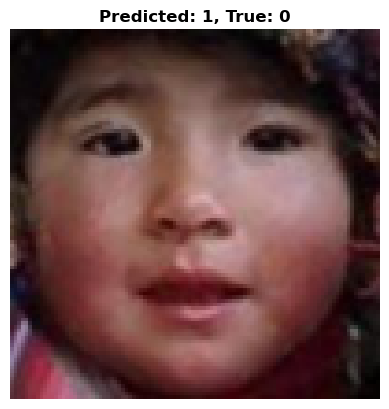

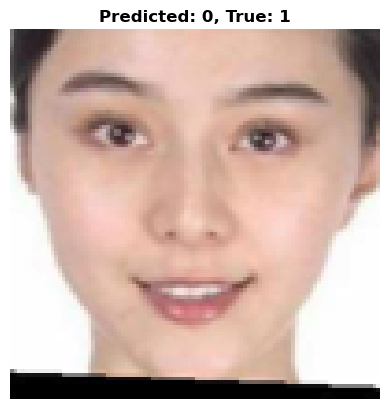

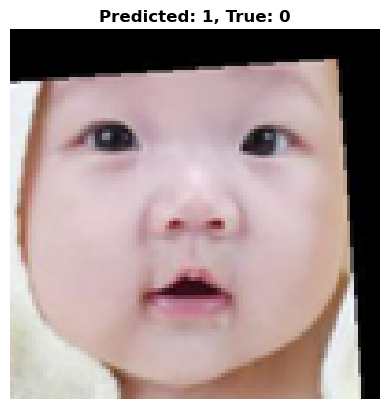

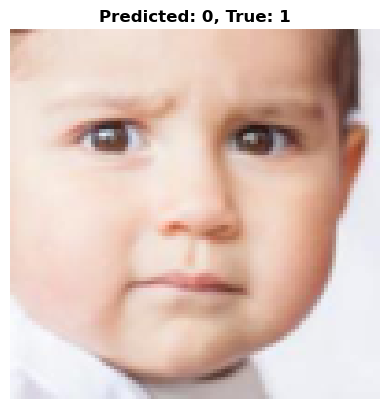

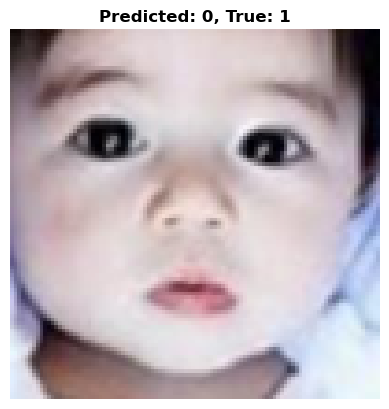

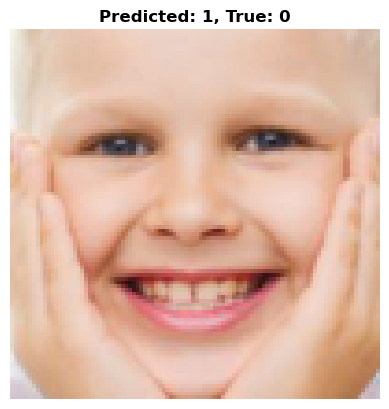

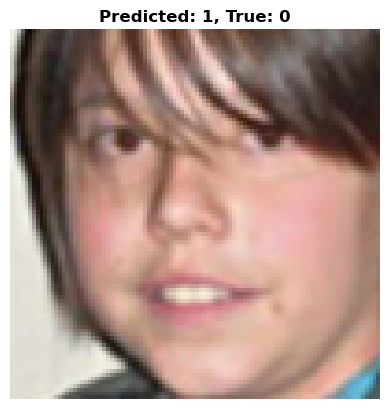

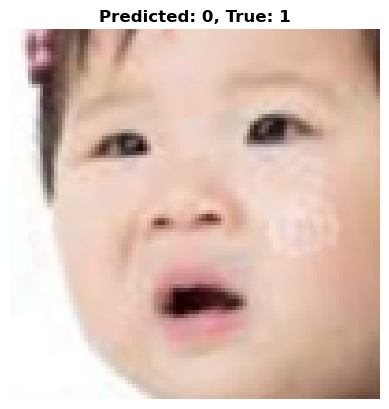

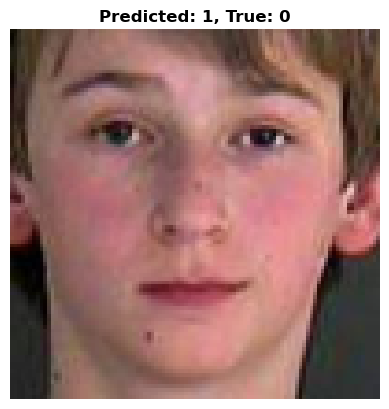

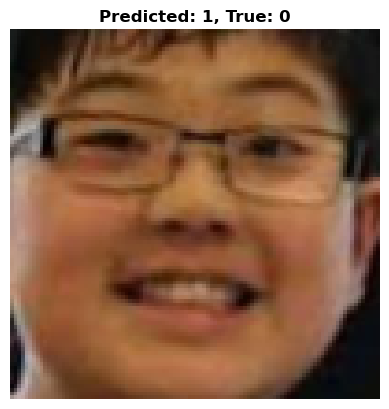

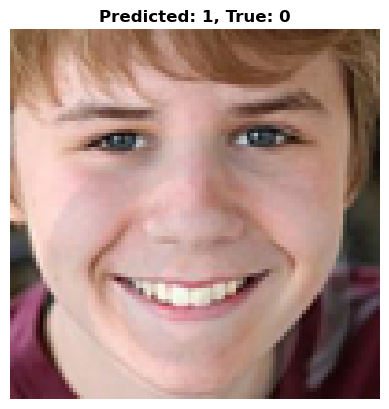

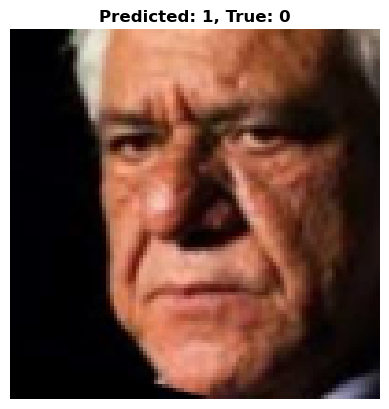

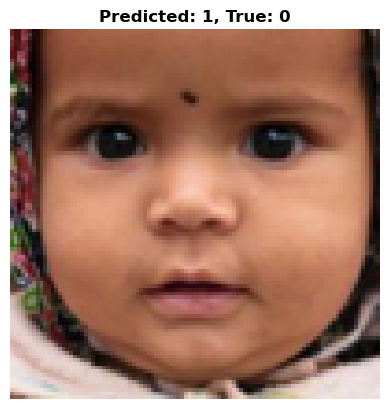

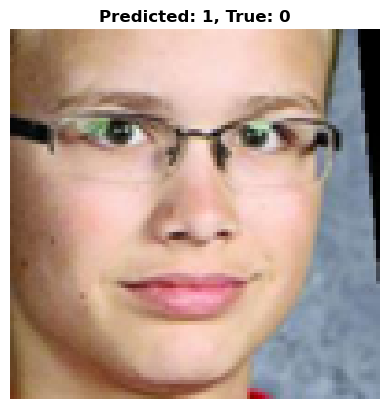

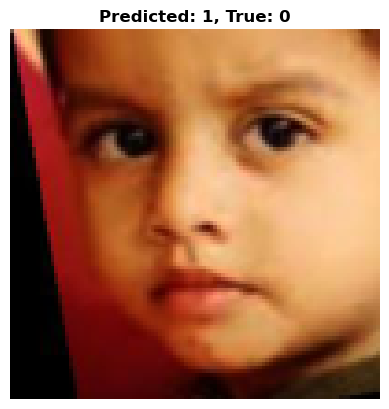

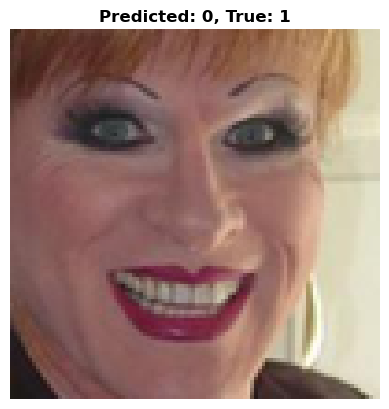

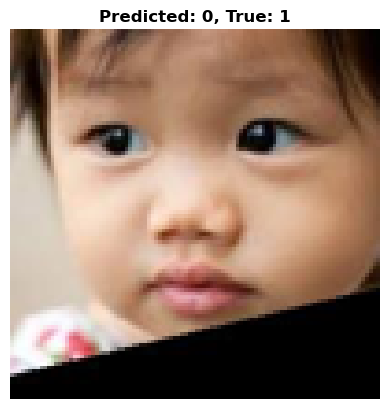

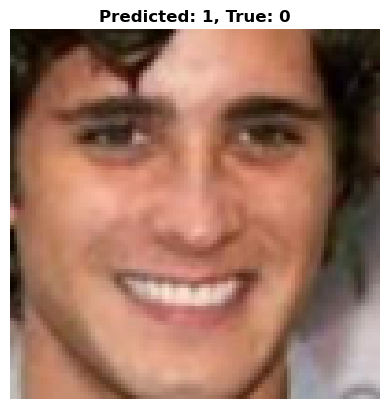

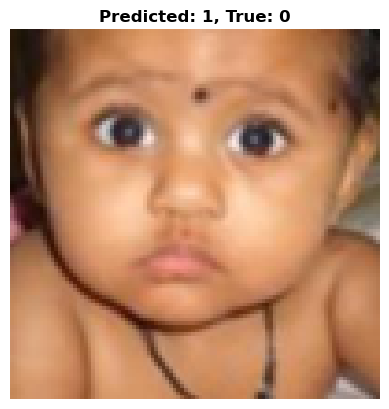

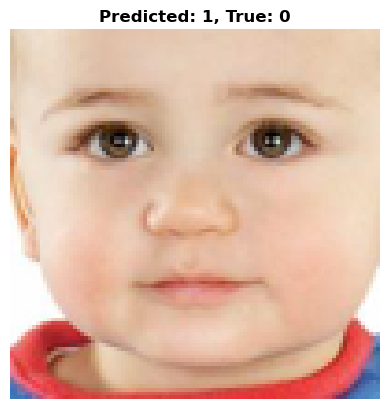

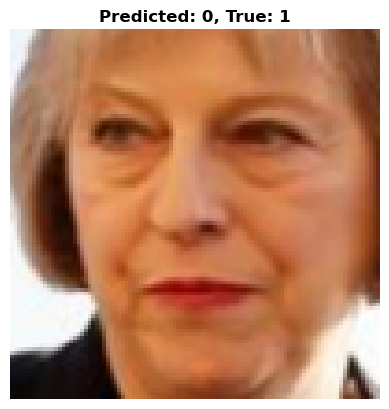

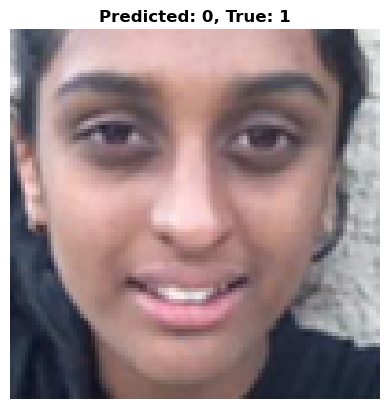

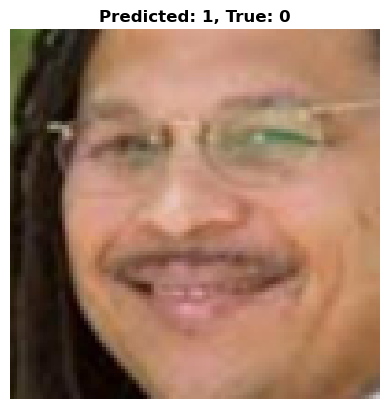

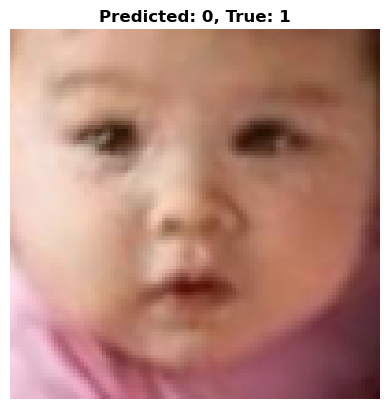

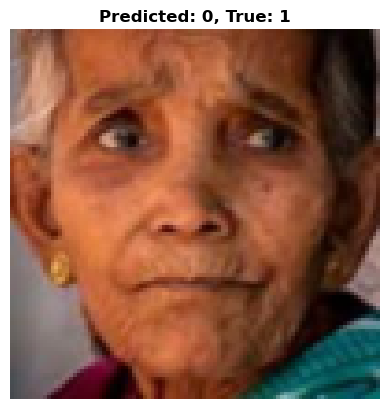

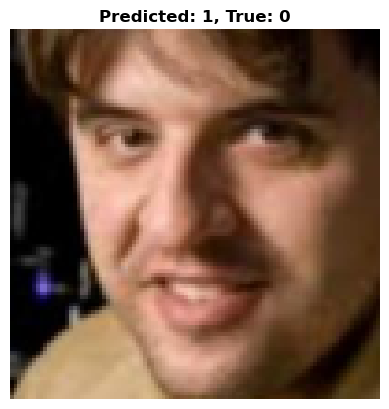

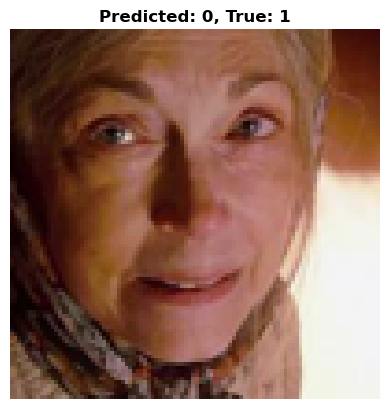

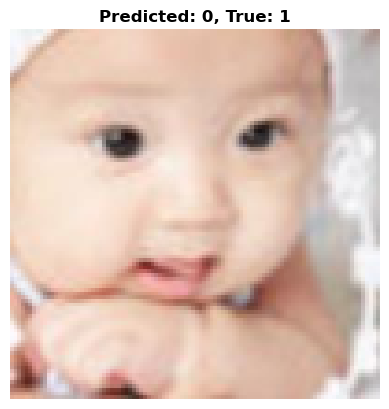

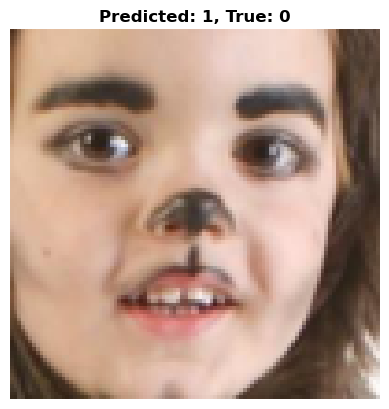

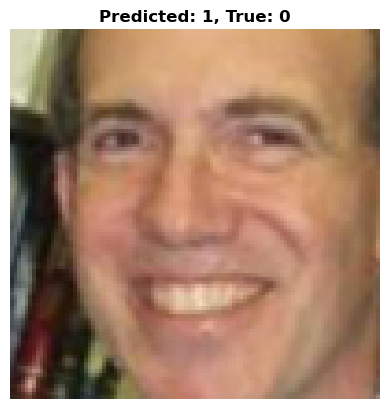

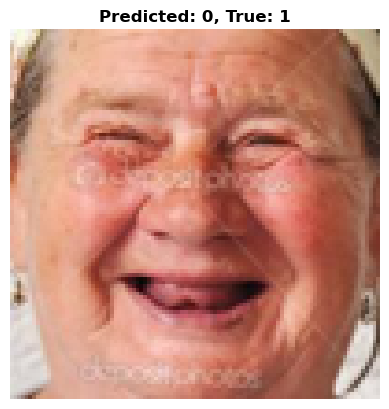

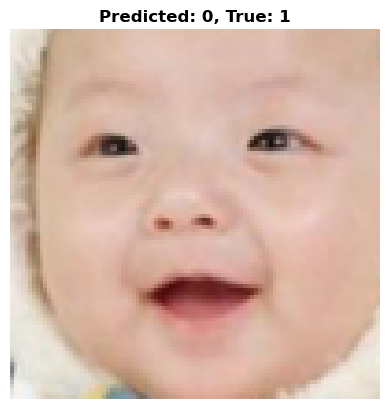

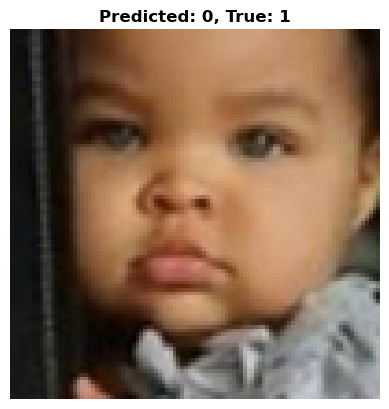

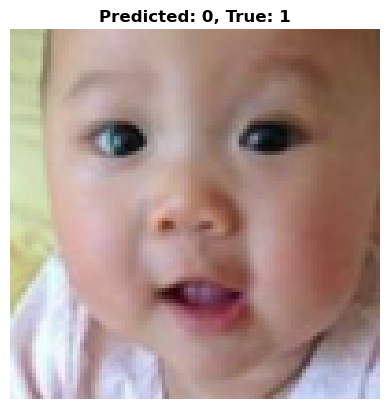

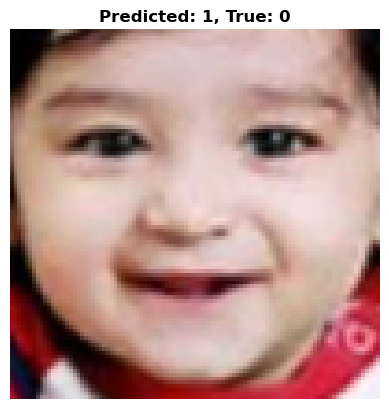

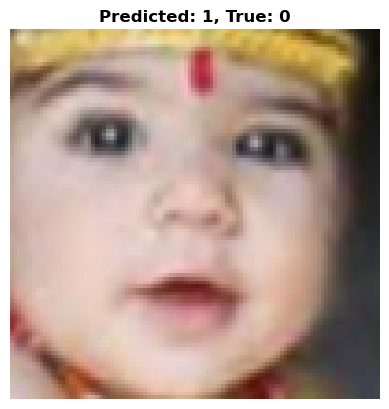

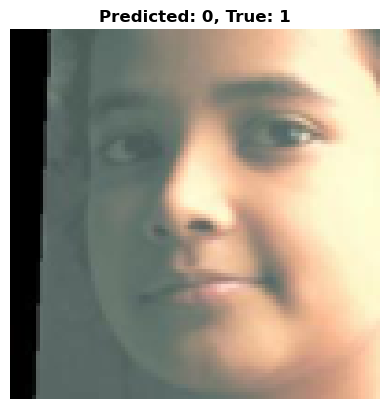

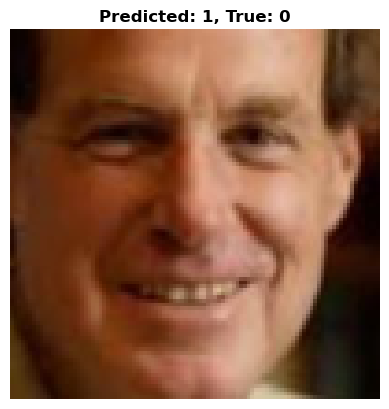

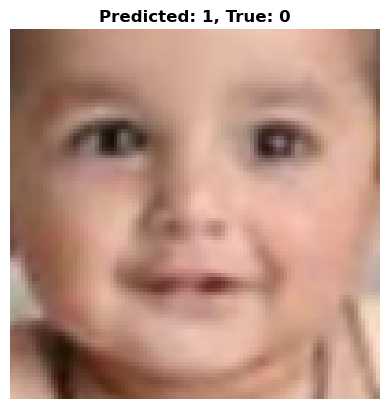

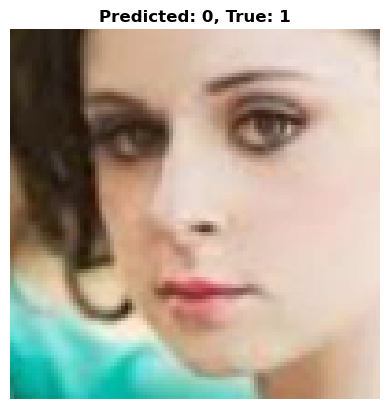

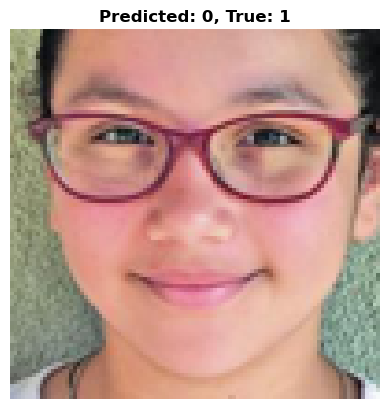

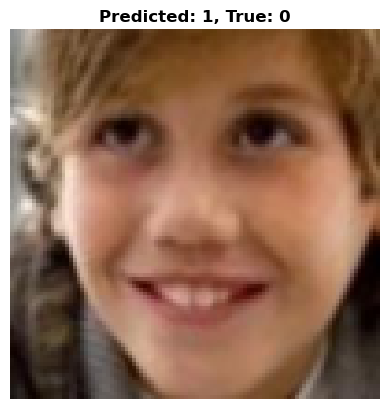

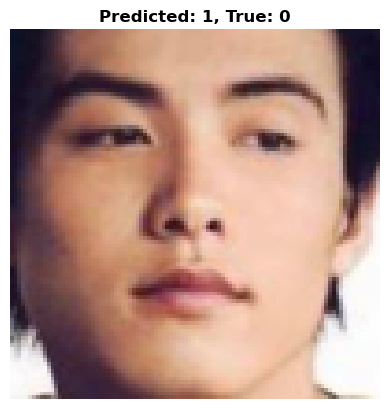

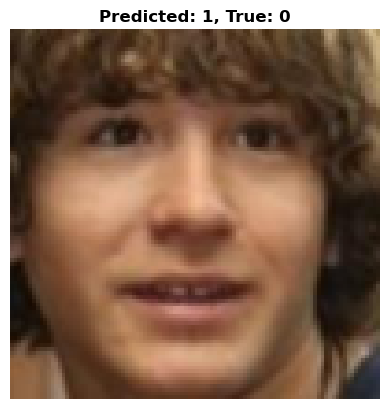

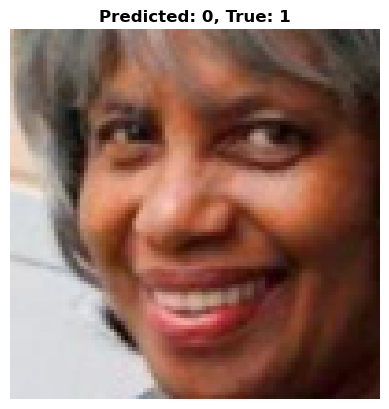

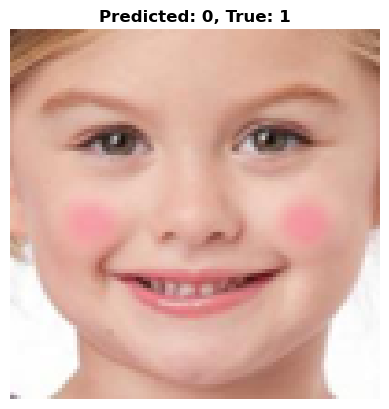

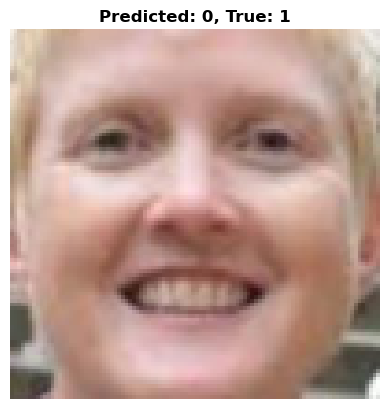

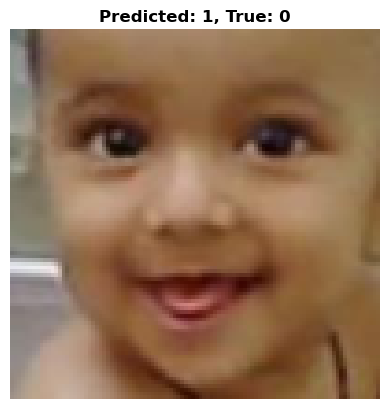

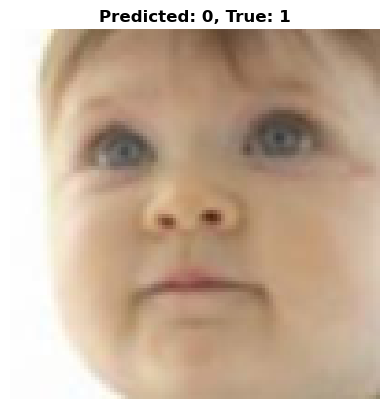

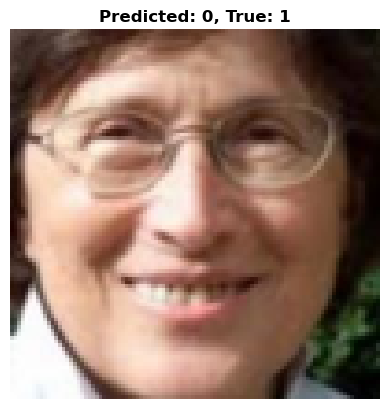

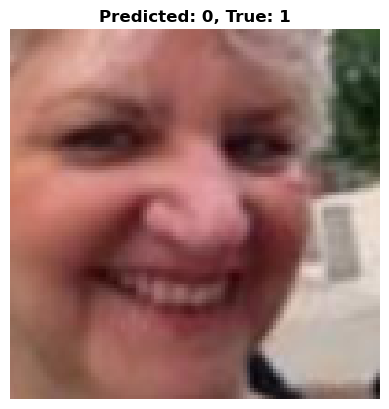

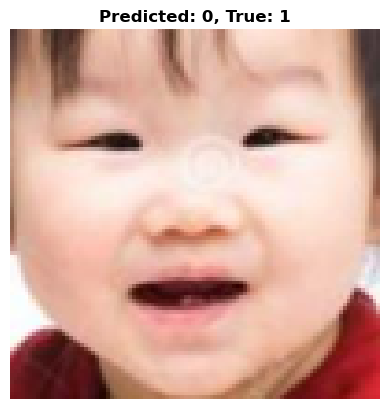

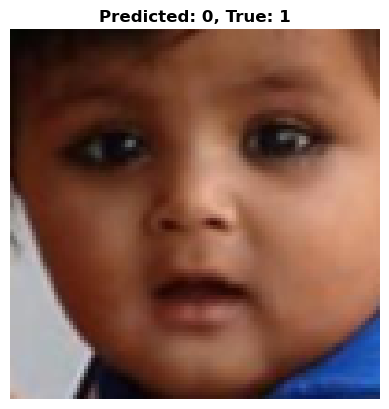

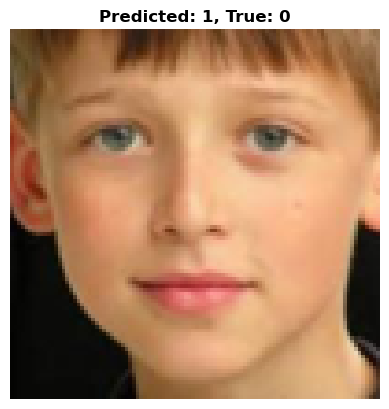

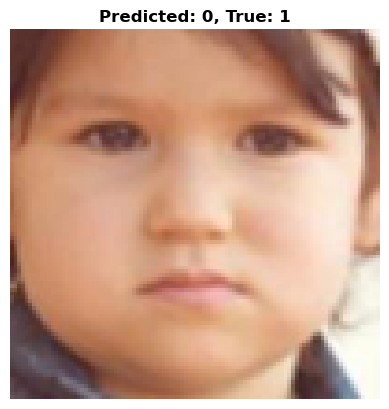

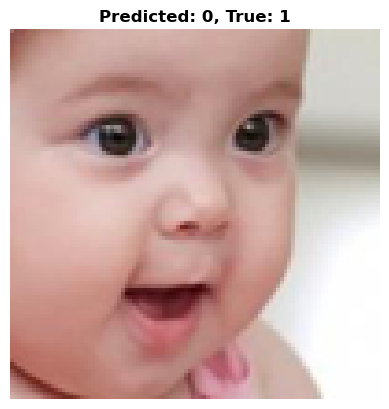

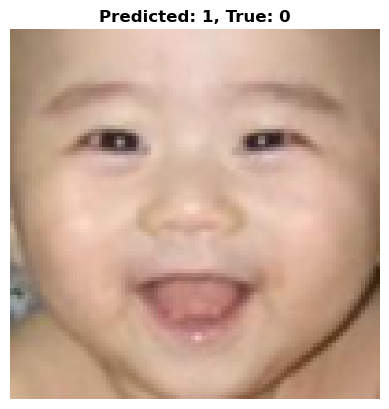

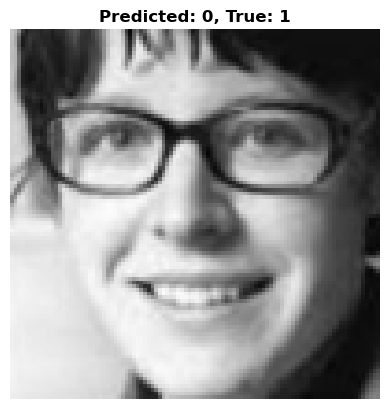

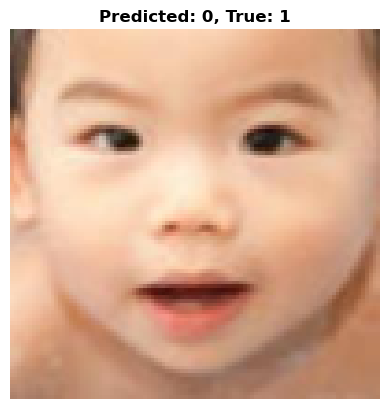

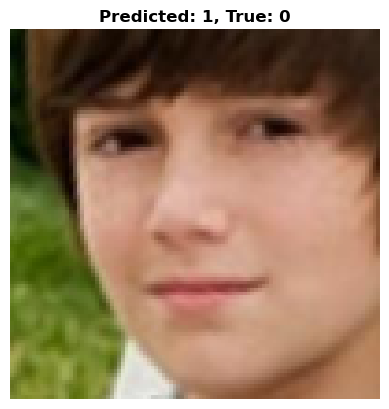

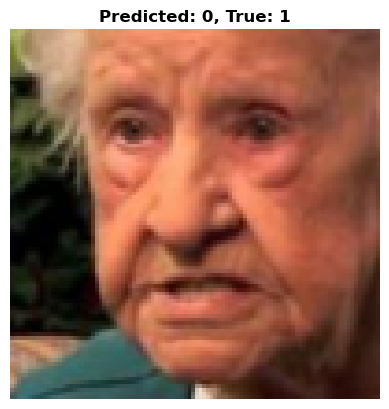

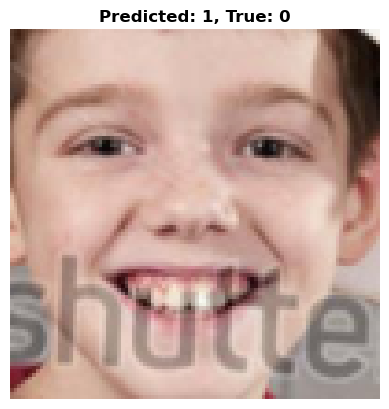

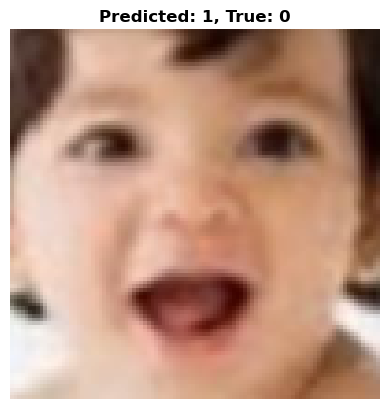

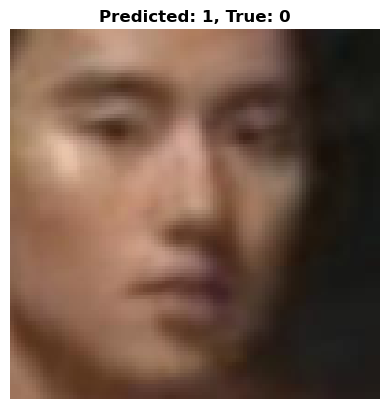

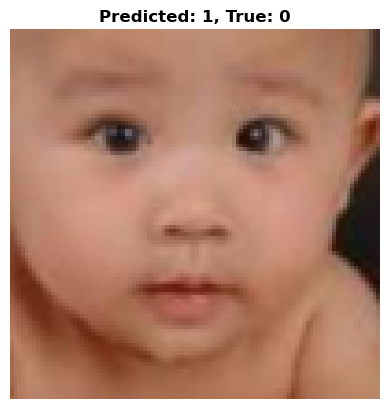

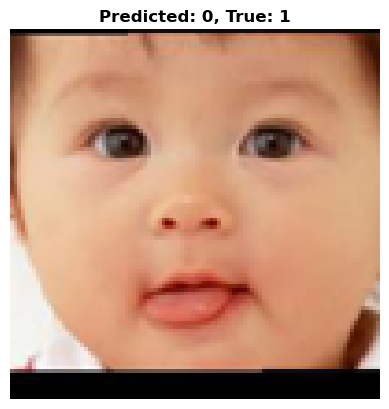

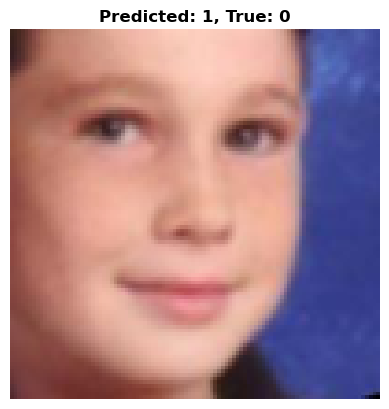

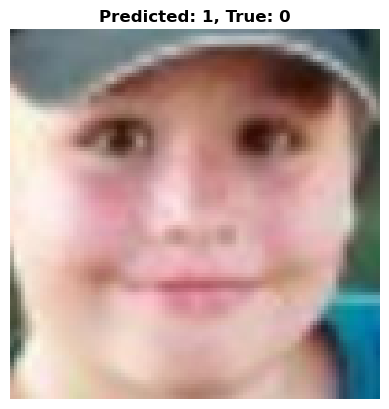

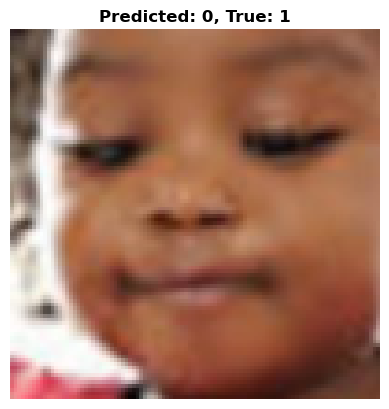

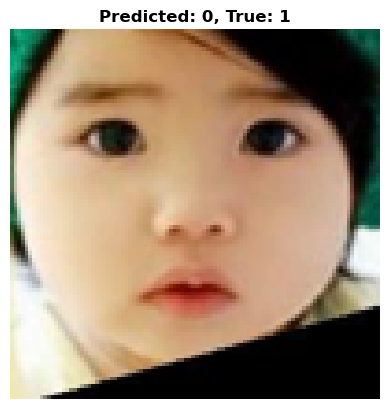

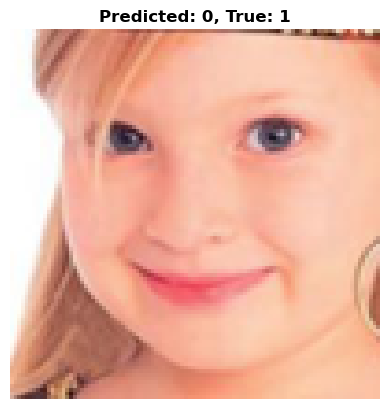

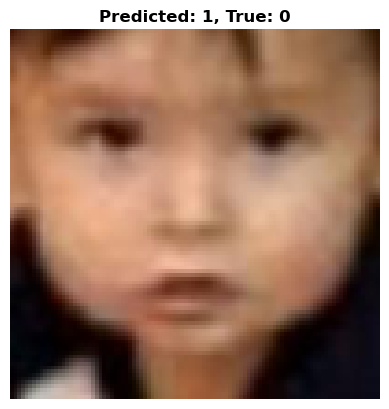

In [35]:
for idx, image in enumerate(incorrect_images):
    plt.title(f"Predicted: {test_predictions[incorrect_indices[idx]]}, True: {y_test.to_list()[incorrect_indices[idx]]}")
    plt.axis('off')
    plt.imshow(image)
    plt.show()

## Incorrectly Classified % by Age Groups

#### Children (1-14)
#### Youth (14-25)
#### Adults (25-40)
#### Middle age (40-60)
#### Very Old (>60)

In [36]:
def age_group(age):
    age = int(age)
    if age >= 1 and age <= 14:
        return 'Children (1-14)'
    elif age > 14 and age <= 25:
        return 'Youth (14-25)'
    elif age > 25 and age <= 40:
        return 'Adults (25-40)'
    elif age > 40 and age <= 60:
        return 'Middle age (40-60)'
    else:
        return 'Old (>60)'


results_age_df = pd.DataFrame({
    'Prediction': test_predictions,
    'True Label': y_test,
    'Age': age_test
})

results_age_df['Correct'] = results_age_df['Prediction'] == results_age_df['True Label']
results_age_df['Age Group'] = results_age_df['Age'].apply(age_group)
results_age_df.reset_index(drop=True, inplace=True)

In [37]:
results_age_df

Prediction True Label Age  Correct           Age Group
0            0          0  37     True      Adults (25-40)
1            1          1  25     True       Youth (14-25)
2            1          1  42     True  Middle age (40-60)
3            1          1  17     True       Youth (14-25)
4            1          1  28     True      Adults (25-40)
..         ...        ...  ..      ...                 ...
795          1          1  81     True           Old (>60)
796          1          1  12     True     Children (1-14)
797          0          0  35     True      Adults (25-40)
798          0          0  29     True      Adults (25-40)
799          1          1   8     True     Children (1-14)

[800 rows x 5 columns]

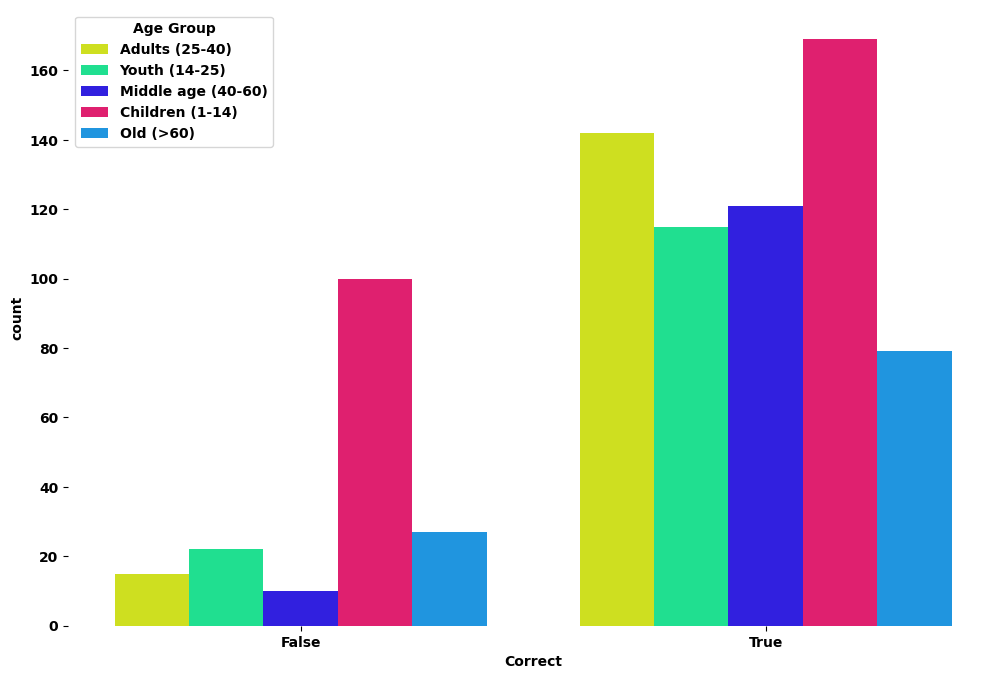

In [38]:
colors = ["#E8FF00", "#00FF96", "#1700FF", "#FF0069", "#009CFF"]

fig, ax = plt.subplots(figsize=(12, 8))

sns.countplot(data=results_age_df, x="Correct", hue="Age Group", palette=colors)



sns.despine(top=True, right=True, bottom=True, left=True)
plt.show()

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
C:\Users\Len

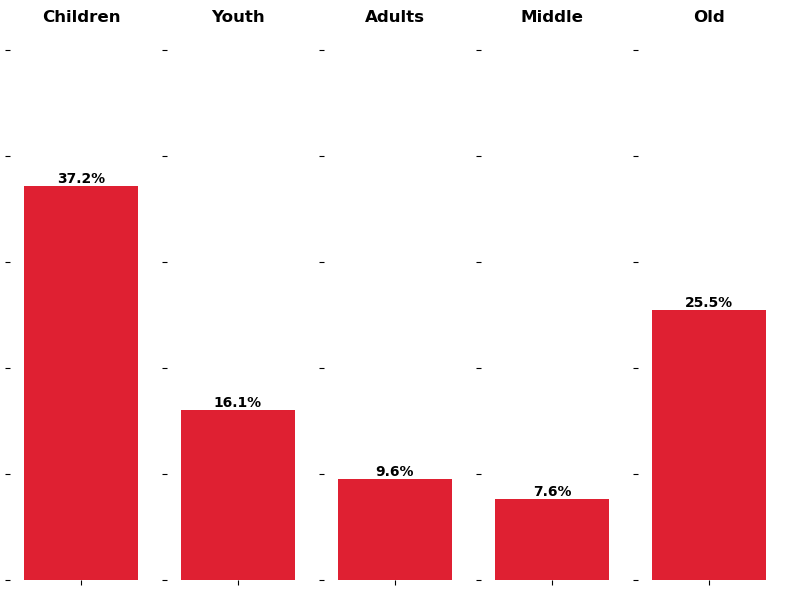

In [39]:
grouped = results_age_df.groupby('Age Group')['Correct'].value_counts(normalize=True).unstack().fillna(0) * 100

age_group_order = ['Children (1-14)', 'Youth (14-25)', 'Adults (25-40)', 'Middle age (40-60)', 'Old (>60)']
grouped = grouped.reindex(age_group_order)

fig, axes = plt.subplots(1, len(grouped), figsize=(8, 6), sharey=True)

for ax, (group, data) in zip(axes, grouped.iterrows()):
    incorrect_percentage = data[False] if False in data.index else 0
    sns.barplot(
        x=[''],
        y=[incorrect_percentage],
        palette=["#FF0018"],  # Красный для неправильных предсказаний
        ax=ax
    )
    ax.set_title(f"{group.split()[0]}", pad=20)
    ax.set_ylabel("")
    ax.set_xlabel("")
    ax.set_ylim(0, 50)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.bar_label(ax.containers[0], fmt='%.1f%%')

sns.despine(top=True, right=True, left=True, bottom=True)

plt.tight_layout()
plt.show()

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


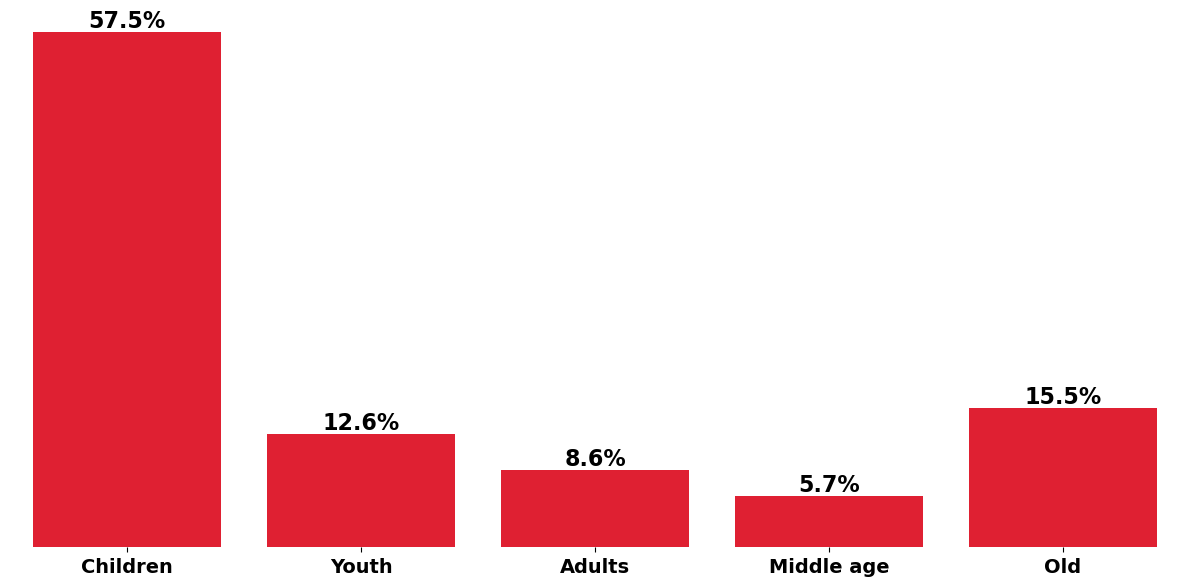

In [40]:
incorrect_predictions = results_age_df[results_age_df['Correct'] == False]
incorrect_counts = incorrect_predictions['Age Group'].value_counts()
total_incorrect = incorrect_predictions.shape[0]
incorrect_percentage = (incorrect_counts / total_incorrect) * 100

age_group_order = ['Children (1-14)', 'Youth (14-25)', 'Adults (25-40)', 'Middle age (40-60)', 'Old (>60)']
age_group_short_names = ['Children', 'Youth', 'Adults', 'Middle age', 'Old']
incorrect_percentage = incorrect_percentage.reindex(age_group_order).fillna(0)

fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x=age_group_short_names, y=incorrect_percentage.values, palette=["#FF0018"], ax=ax)

ax.set_title("", pad=20, fontsize=16)
ax.set_ylabel("", fontsize=14)
ax.set_xlabel("", fontsize=14)
ax.set_ylim(0, 60)
ax.bar_label(ax.containers[0], fmt='%.1f%%', fontsize=16)

sns.despine(top=True, right=True, left=True, bottom=True)
ax.set_yticks([])
plt.xticks(rotation=0, ha='center', fontsize=14)
plt.yticks(fontsize=14)

plt.savefig("Incorrect_predictions")
plt.tight_layout()
plt.show()

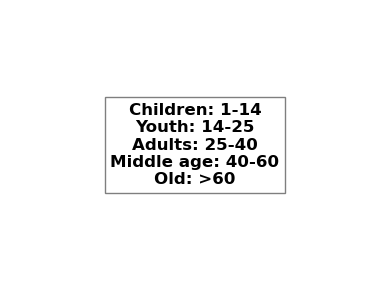

In [41]:

# Текстовый блок с диапазонами возрастов
age_ranges_text = (
    "Children: 1-14\n"
    "Youth: 14-25\n"
    "Adults: 25-40\n"
    "Middle age: 40-60\n"
    "Old: >60"
)

fig, ax = plt.subplots(figsize=(4, 3))

# Отключаем оси
ax.axis('off')

# Добавляем текстовый блок в центр графика
plt.text(
    0.5, 0.5, age_ranges_text, transform=ax.transAxes,
    fontsize=12, verticalalignment='center', horizontalalignment='center', bbox=dict(facecolor='white', alpha=0.5)
)

plt.savefig("legend")
plt.tight_layout()
plt.show()

# My photo prediction

In [44]:
my_img = "C:\\Users\\Lenovo\\Documents\\Bootcamp\\Projects\\Supervised ML\\aligned_cropped_faces\\KATY.jpg"
my_img = [np.array(preprocess_image(my_img).tolist())]

In [ ]:
my_img

In [45]:
svc.predict(my_img)

array(['1'], dtype=object)